# VRNOF Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_vrnof = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/vrnof.csv')
df_vrnof['Date'] = pd.to_datetime(df_vrnof['Date'])
df_vrnof = df_vrnof.set_index('Date')
df_vrnof = df_vrnof.rename(columns={'Open':'vrnof_Open', 'High':'vrnof_High', 'Low':'vrnof_Low', 'Close':'vrnof_Close', 'Volume':'vrnof_Volume'})
df_vrnof = df_vrnof.drop('Adj Close', axis=1)
df_vrnof['vrnof_prev_close'] = df_vrnof['vrnof_Close'].shift(1)
df_vrnof['vrnof_next_close'] = df_vrnof['vrnof_Close'].shift(-1)
df_vrnof['vrnof_diff'] = df_vrnof['vrnof_Close'].diff()
df_vrnof['vrnof_%change'] = df_vrnof['vrnof_Close'].pct_change()
df_vrnof['vrnof_5day_avg_close'] = df_vrnof['vrnof_Close'].rolling(5).mean()
df_vrnof['vrnof_5day_avg_diff'] = df_vrnof['vrnof_diff'].rolling(5).mean()
df_vrnof['vrnof_10day_avg_close'] = df_vrnof['vrnof_Close'].rolling(10).mean()
df_vrnof['vrnof_10day_avg_diff'] = df_vrnof['vrnof_diff'].rolling(10).mean()

In [4]:
df_vrnof

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   
...                ...         ...        ...          ...           ...   
2022-05-03    7.860000    8.160000   7.800000     7.950000        382800   
2022-05-04    8.040000    8.040000   7.630000     7.950000        496100   
2022-05-05    8.030000    8.030000   7.320000     7.630000       1401900   
2022-05-06    7.594000    7.880000   7.120000     7.780000       1411200   
2022-05-09    7.450000    7.900000   7.350000     7.500000        532100   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18               NaN         25.350000         NaN            NaN   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   
...                      ...               ...         ...            ...   
2022-05-03             7.950          7.950000    0.000000       0.000000   
2022-05-04             7.950          7.630000    0.000000       0.000000   
2022-05-05             7.950          7.780000   -0.320000      -0.040252   
2022-05-06             7.630          7.500000    0.150000       0.019659   
2022-05-09             7.780               NaN   -0.280000      -0.035990   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                   NaN                  NaN                    NaN   
2021-02-19                   NaN                  NaN                    NaN   
2021-02-22                   NaN                  NaN                    NaN   
2021-02-23                   NaN                  NaN                    NaN   
2021-02-24               24.2806                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03                7.8480                0.002                  7.973   
2022-05-04                7.9480                0.100                  7.928   
2022-05-05                7.8680               -0.080                  7.889   
2022-05-06                7.8520               -0.016                  7.854   
2022-05-09                7.7620               -0.090                  7.804   

            vrnof_10day_avg_diff  
Date                              
2021-02-18                   NaN  
2021-02-19                   NaN  
2021-02-22                   NaN  
2021-02-23                   NaN  
2021-02-24                   NaN  
...                          ...  
2022-05-03                -0.054  
2022-05-04                -0.045  
2022-05-05                -0.039  
2022-05-06                -0.035  
2022-05-09                -0.050  

[309 rows x 13 columns]

In [5]:
cut = df_vrnof.index.min()
cut

Timestamp('2021-02-18 00:00:00')

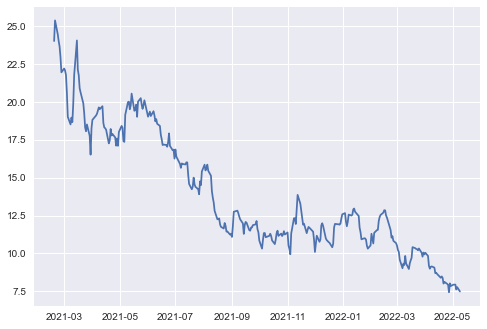

In [6]:
plt.plot(df_vrnof['vrnof_Close'])

## VRNOF and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-04   33171.80   34117.74  33021.84    34061.06  479098068.0   
2022-05-05   33854.17   33854.17  32685.10    32997.97  507031169.0   
2022-05-06   32773.88   33055.84  32474.69    32899.37  457941820.0   
2022-05-09   32685.17   32685.17  32121.98    32245.70  535207901.0   
2022-05-10   32504.09   32752.17  31887.89    32160.74  493104054.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-04         33128.79         32997.97     932.27      0.028141   
2022-05-05         34061.06         32899.37   -1063.09     -0.031211   
2022-05-06         32997.97         32245.70     -98.60     -0.002988   
2022-05-09         32899.37         32160.74    -653.67     -0.019869   
2022-05-10         32245.70              NaN     -84.96     -0.002635   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-04            33428.990             151.826             33634.068   
2022-05-05            33245.306            -183.684             33454.589   
2022-05-06            33229.738             -15.568             33363.386   
2022-05-09            33066.578            -163.160             33183.010   
2022-05-10            32872.968            -193.610             33075.066   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-04             -109.973  
2022-05-05             -179.479  
2022-05-06              -91.203  
2022-05-09             -180.376  
2022-05-10             -107.944  

[32631 rows x 13 columns]

In [8]:
df0 = pd.merge(df_vrnof, df_dow, on='Date', how='left')
df0

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   
...                ...         ...        ...          ...           ...   
2022-05-03    7.860000    8.160000   7.800000     7.950000        382800   
2022-05-04    8.040000    8.040000   7.630000     7.950000        496100   
2022-05-05    8.030000    8.030000   7.320000     7.630000       1401900   
2022-05-06    7.594000    7.880000   7.120000     7.780000       1411200   
2022-05-09    7.450000    7.900000   7.350000     7.500000        532100   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18               NaN         25.350000         NaN            NaN   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   
...                      ...               ...         ...            ...   
2022-05-03             7.950          7.950000    0.000000       0.000000   
2022-05-04             7.950          7.630000    0.000000       0.000000   
2022-05-05             7.950          7.780000   -0.320000      -0.040252   
2022-05-06             7.630          7.500000    0.150000       0.019659   
2022-05-09             7.780               NaN   -0.280000      -0.035990   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                   NaN                  NaN                    NaN   
2021-02-19                   NaN                  NaN                    NaN   
2021-02-22                   NaN                  NaN                    NaN   
2021-02-23                   NaN                  NaN                    NaN   
2021-02-24               24.2806                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03                7.8480                0.002                  7.973   
2022-05-04                7.9480                0.100                  7.928   
2022-05-05                7.8680               -0.080                  7.889   
2022-05-06                7.8520               -0.016                  7.854   
2022-05-09                7.7620               -0.090                  7.804   

            vrnof_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2021-02-18                   NaN   31558.60   31558.60  31285.32    31493.34   
2021-02-19                   NaN   31504.13   31647.53  31469.34    31494.32   
2021-02-22                   NaN   31381.12   31653.48  31286.57    31521.69   
2021-02-23                   NaN   31501.89   31653.38  31158.76    31537.35   
2021-02-24                   NaN   31499.75   32009.64  31421.29    31961.86   
...                          ...        ...        ...       ...         ...   
2022-05-03                -0.054   33086.09   33341.58  32914.75    33128.79   
2022-05-04                -0.045   33171.80   34117.74  33021.84    34061.06   
2022-05-05                -0.039   33854.17   33854.17  32685.10    32997.97   
2022-05-06                -0.035   32773.88   33055.84  32474.69    32899.37   
2022-05-09          

In [9]:
df_isna0 = df0.isna()
df_isna0

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18       False       False      False        False         False   
2021-02-19       False       False      False        False         False   
2021-02-22       False       False      False        False         False   
2021-02-23       False       False      False        False         False   
2021-02-24       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18              True             False        True           True   
2021-02-19             False             False       False          False   
2021-02-22             False             False       False          False   
2021-02-23             False             False       False          False   
2021-02-24             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                  True                 True                   True   
2021-02-19                  True                 True                   True   
2021-02-22                  True                 True                   True   
2021-02-23                  True                 True                   True   
2021-02-24                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            vrnof_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2021-02-18                  True      False      False     False       False   
2021-02-19                  True      False      False     False       False   
2021-02-22                  True      False      False     False       False   
2021-02-23                  True      False      False     False       False   
2021-02-24                  True      False      False     False       False   
...                          ...        ...        ...       ...         ...   
2022-05-03                 False      False      False     False       False   
2022-05-04                 False      False      False     False       False   
2022-05-05                 False      False      False     False       False   
2022-05-06                 False      False      False     False       False   
2022-05-09          

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18             0.000         25.350000    0.000000       0.000000   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                0.0000                  0.0                    0.0   
2021-02-19                0.0000                  0.0                    0.0   
2021-02-22                0.0000                  0.0                    0.0   
2021-02-23                0.0000                  0.0                    0.0   
2021-02-24               24.2806                  0.0                    0.0   

            vrnof_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2021-02-18                   0.0   31558.60   31558.60  31285.32    31493.34   
2021-02-19                   0.0   31504.13   31647.53  31469.34    31494.32   
2021-02-22                   0.0   31381.12   31653.48  31286.57    31521.69   
2021-02-23                   0.0   31501.89   31653.38  31158.76    31537.35   
2021-02-24                   0.0   31499.75   32009.64  31421.29    31961.86   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2021-02-18  369535872.0         31613.02         31494.32    -119.68   
2021-02-19  402127643.0         31493.34         31521.69       0.98   
2021-02-22  462830059.0         31494.32         31537.35      27.37   
2021-02-23  532120363.0         31521.69         31961.86      15.66   
2021-02-24  473681244.0         31537.35         31402.01     424.51   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2021-02-18     -0.003786            31503.642              11.108   
2021-02-19      0.000031            31516.366              12.724   
2021-02-22      0.000869            31529.024              12.658   
2021-02-23      0.000497            31531.944               2.920   
2021-02-24      0.013461            31601.712              69.768   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2021-02-18             31392.170               76.974  
2021-02-19             31436.016               43.846  
2021-02-22             31473.361               37.345  
2021-02-23             31488.520               15.159  
2021-02-24             31547.123               58.603

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   
...                ...         ...        ...          ...           ...   
2022-05-03    7.860000    8.160000   7.800000     7.950000        382800   
2022-05-04    8.040000    8.040000   7.630000     7.950000        496100   
2022-05-05    8.030000    8.030000   7.320000     7.630000       1401900   
2022-05-06    7.594000    7.880000   7.120000     7.780000       1411200   
2022-05-09    7.450000    7.900000   7.350000     7.500000        532100   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18             0.000         25.350000    0.000000       0.000000   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   
...                      ...               ...         ...            ...   
2022-05-03             7.950          7.950000    0.000000       0.000000   
2022-05-04             7.950          7.630000    0.000000       0.000000   
2022-05-05             7.950          7.780000   -0.320000      -0.040252   
2022-05-06             7.630          7.500000    0.150000       0.019659   
2022-05-09             7.780          0.000000   -0.280000      -0.035990   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                0.0000                0.000                  0.000   
2021-02-19                0.0000                0.000                  0.000   
2021-02-22                0.0000                0.000                  0.000   
2021-02-23                0.0000                0.000                  0.000   
2021-02-24               24.2806                0.000                  0.000   
...                          ...                  ...                    ...   
2022-05-03                7.8480                0.002                  7.973   
2022-05-04                7.9480                0.100                  7.928   
2022-05-05                7.8680               -0.080                  7.889   
2022-05-06                7.8520               -0.016                  7.854   
2022-05-09                7.7620               -0.090                  7.804   

            vrnof_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2021-02-18                 0.000   31558.60   31558.60  31285.32    31493.34   
2021-02-19                 0.000   31504.13   31647.53  31469.34    31494.32   
2021-02-22                 0.000   31381.12   31653.48  31286.57    31521.69   
2021-02-23                 0.000   31501.89   31653.38  31158.76    31537.35   
2021-02-24                 0.000   31499.75   32009.64  31421.29    31961.86   
...                          ...        ...        ...       ...         ...   
2022-05-03                -0.054   33086.09   33341.58  32914.75    33128.79   
2022-05-04                -0.045   33171.80   34117.74  33021.84    34061.06   
2022-05-05                -0.039   33854.17   33854.17  32685.10    32997.97   
2022-05-06                -0.035   32773.88   33055.84  32474.69    32899.37   
2022-05-09          

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'vrnof_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2021-02-18      2   18  2021        1   25.219999   26.000000  23.728001   
2021-02-19      2   19  2021        1   24.341000   28.000000  23.988001   
2021-02-22      2   22  2021        1   24.542999   28.000000  23.790001   
2021-02-23      2   23  2021        1   23.990000   24.400000  22.684000   
2021-02-24      2   24  2021        1   24.000000   24.200001  22.990999   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_next_close  \
Date                                                                        
2021-02-18    23.993000          7300             0.000         25.350000   
2021-02-19    25.350000        140000            23.993         24.437000   
2021-02-22    24.437000        278200            25.350         23.993000   
2021-02-23    23.993000        171900            24.437         23.629999   
2021-02-24    23.629999        180000            23.993         22.929001   

            vrnof_diff  vrnof_%change  vrnof_5day_avg_close  \
Date                                                          
2021-02-18    0.000000       0.000000                0.0000   
2021-02-19    1.357000       0.056558                0.0000   
2021-02-22   -0.913000      -0.036016                0.0000   
2021-02-23   -0.444000      -0.018169                0.0000   
2021-02-24   -0.363001      -0.015129               24.2806   

            vrnof_5day_avg_diff  vrnof_10day_avg_close  vrnof_10day_avg_diff  \
Date                                                                           
2021-02-18                  0.0                    0.0                   0.0   
2021-02-19                  0.0                    0.0                   0.0   
2021-02-22                  0.0                    0.0                   0.0   
2021-02-23                  0.0                    0.0                   0.0   
2021-02-24                  0.0                    0.0                   0.0   

            djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
2021-02-18   31558.60   31558.60  31285.32    31493.34  369535872.0   
2021-02-19   31504.13   31647.53  31469.34    31494.32  402127643.0   
2021-02-22   31381.12   31653.48  31286.57    31521.69  462830059.0   
2021-02-23   31501.89   31653.38  31158.76    31537.35  532120363.0   
2021-02-24   31499.75   32009.64  31421.29    31961.86  473681244.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
2021-02-18         31613.02         31494.32    -119.68     -0.003786   
2021-02-19         31493.34         31521.69       0.98      0.000031   
2021-02-22         31494.32         31537.35      27.37      0.000869   
2021-02-23         31521.69         31961.86      15.66      0.000497   
2021-02-24         31537.35         31402.01     424.51      0.013461   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
2021-02-18            31503.642              11.108             31392.170   
2021-02-19            31516.366              12.724             31436.016   
2021-02-22            31529.024              12.658             31473.361   
2021-02-23            31531.944               2.920             31488.520   
2021-02-24            31601.712              69.768             31547.123   

            djix_10day_avg_diff  vrnof_Open_b  vrnof_High_b  vrnof_Low_b  \
Date                                                                       
2021-02-18               76.974         False         False        False   
2021-02-19               43.846         False         False        False   
2021-02-22               37.345         False         False        False   
2021-0

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(308, 56)

In [18]:
n = int(len(df0) * 0.9)
n

277

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

277
31


In [21]:
X_train0 = train0.drop('vrnof_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2021-02-18      2   18  2021        1   25.219999        26.0  23.728001   
2021-02-19      2   19  2021        1   24.341000        28.0  23.988001   
2021-02-22      2   22  2021        1   24.542999        28.0  23.790001   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_diff  \
Date                                                                  
2021-02-18       23.993          7300             0.000       0.000   
2021-02-19       25.350        140000            23.993       1.357   
2021-02-22       24.437        278200            25.350      -0.913   

            vrnof_%change  vrnof_5day_avg_close  vrnof_5day_avg_diff  \
Date                                                                   
2021-02-18       0.000000                   0.0                  0.0   
2021-02-19       0.056558                   0.0                  0.0   
2021-02-22      -0.036016                   0.0                  0.0   

            vrnof_10day_avg_close  vrnof_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2021-02-18                    0.0                   0.0   31558.60   31558.60   
2021-02-19                    0.0                   0.0   31504.13   31647.53   
2021-02-22                    0.0                   0.0   31381.12   31653.48   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2021-02-18  31285.32    31493.34  369535872.0         31613.02   
2021-02-19  31469.34    31494.32  402127643.0         31493.34   
2021-02-22  31286.57    31521.69  462830059.0         31494.32   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2021-02-18         31494.32    -119.68     -0.003786            31503.642   
2021-02-19         31521.69       0.98      0.000031            31516.366   
2021-02-22         31537.35      27.37      0.000869            31529.024   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2021-02-18              11.108             31392.170               76.974   
2021-02-19              12.724             31436.016               43.846   
2021-02-22              12.658             31473.361               37.345   

            vrnof_Open_b  vrnof_High_b  vrnof_Low_b  vrnof_Close_b  \
Date                                                                 
2021-02-18         False         False        False          False   
2021-02-19         False         False        False          False   
2021-02-22         False         False        False          False   

            vrnof_Volume_b  vrnof_prev_close_b  vrnof_next_close_b  \
Date                                                                 
2021-02-18           False                True               False   
2021-02-19           False               False               False   
2021-02-22           False               False               False   

            vrnof_diff_b  vrnof_%change_b  vrnof_5day_avg_close_b  \
Date                                                                
2021-02-18          True             True                    True   
2021-02-19         False            False                    True   
2021-02-22         False            False                    True   

            vrnof_5day_avg_diff_b  vrnof_10day_avg_close_b  \
Date                                                         
2021-02-18                   True                     True   
2021-02-19                   True                     True   
2021-02-22                   True                     True   

            vrnof_10day_avg_diff_b  djix_Open_

In [22]:
X_train0.shape

(277, 55)

In [23]:
y_train0 = train0['vrnof_next_close']
y_train0.head(3)

Date
2021-02-18    25.350
2021-02-19    24.437
2021-02-22    23.993
Name: vrnof_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2022-03-21    10.30
2022-03-22    10.28
2022-03-23    10.21
Name: vrnof_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('vrnof_next_close', axis=1)
y_test0 = test0['vrnof_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2022-03-24      3   24  2022        1       10.55       10.64      10.16   
2022-03-25      3   25  2022        1       10.60       10.70      10.14   
2022-03-28      3   28  2022        1       10.25       10.45       9.56   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_diff  \
Date                                                                  
2022-03-24        10.21        471600             10.28       -0.07   
2022-03-25        10.33        439200             10.21        0.12   
2022-03-28        10.05        532500             10.33       -0.28   

            vrnof_%change  vrnof_5day_avg_close  vrnof_5day_avg_diff  \
Date                                                                   
2022-03-24      -0.006809                10.312                0.100   
2022-03-25       0.011753                10.294               -0.018   
2022-03-28      -0.027106                10.234               -0.060   

            vrnof_10day_avg_close  vrnof_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2022-03-24                 9.8488                0.0370   34406.81   34713.56   
2022-03-25                 9.9478                0.0990   34702.39   34942.70   
2022-03-28                10.0550                0.1072   34833.03   34957.93   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2022-03-24  34355.42    34707.94  365854858.0         34358.50   
2022-03-25  34631.52    34861.24  323036635.0         34707.94   
2022-03-28  34552.23    34955.89  341647029.0         34861.24   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2022-03-24         34861.24     349.44      0.010170            34636.364   
2022-03-25         34955.89     153.30      0.004417            34657.626   
2022-03-28         35294.19      94.65      0.002715            34738.206   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2022-03-24              45.436             34115.945              153.387   
2022-03-25              21.262             34307.650              191.705   
2022-03-28              80.580             34508.715              201.065   

            vrnof_Open_b  vrnof_High_b  vrnof_Low_b  vrnof_Close_b  \
Date                                                                 
2022-03-24         False         False        False          False   
2022-03-25         False         False        False          False   
2022-03-28         False         False        False          False   

            vrnof_Volume_b  vrnof_prev_close_b  vrnof_next_close_b  \
Date                                                                 
2022-03-24           False               False               False   
2022-03-25           False               False               False   
2022-03-28           False               False               False   

            vrnof_diff_b  vrnof_%change_b  vrnof_5day_avg_close_b  \
Date                                                                
2022-03-24         False            False                   False   
2022-03-25         False            False                   False   
2022-03-28         False            False                   False   

            vrnof_5day_avg_diff_b  vrnof_10day_avg_close_b  \
Date                                                         
2022-03-24                  False                    False   
2022-03-25                  False                    False   
2022-03-28                  False                    False   

            vrnof_10day_avg_diff_b  djix_Open_

In [27]:
X_test0.shape

(31, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-04    7.63
2022-05-05    7.78
2022-05-06    7.50
Name: vrnof_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([10.24472083, 10.2726081 ,  9.95642614,  9.85392434,  9.99973076])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

0.2958075125957871


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

0.23000099509349764


In [34]:
hyper_table.append(dict(version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

In [35]:
y_train0 = pd.DataFrame(y_train0, columns=['vrnof_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['vrnof_next_close'])

In [36]:
y_test0['vrnof_pred_next_close'] = y_pred0

In [37]:
y_test0.tail()

vrnof_next_close  vrnof_pred_next_close
Date                                               
2022-05-02              7.95               7.696595
2022-05-03              7.95               8.125185
2022-05-04              7.63               7.735617
2022-05-05              7.78               7.110061
2022-05-06              7.50               7.226034

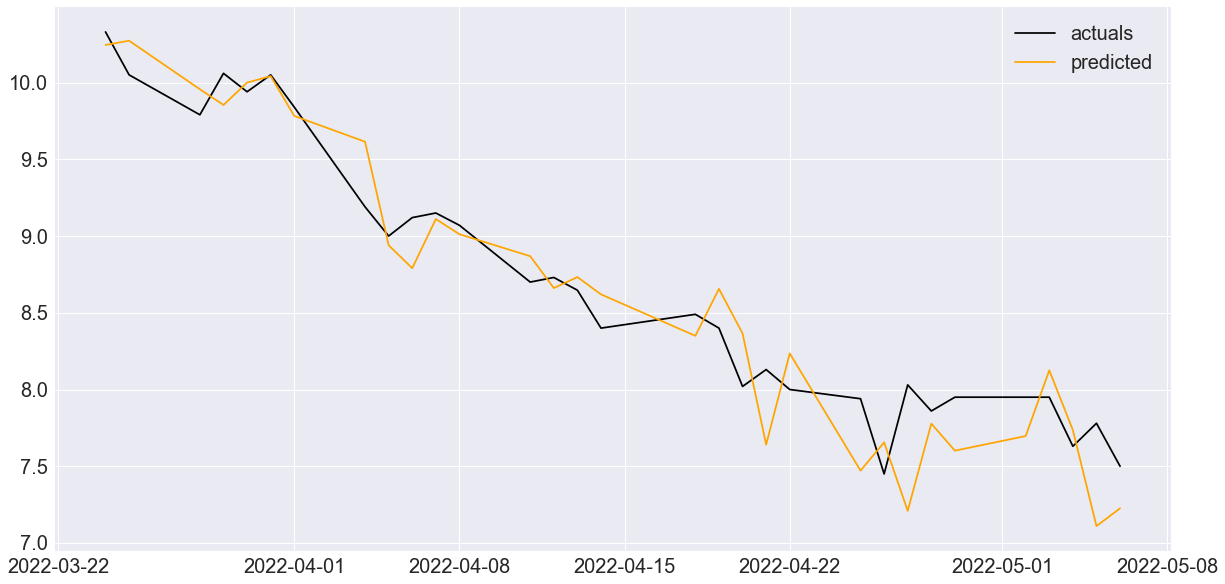

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['vrnof_next_close'], color='black')
ax.plot(y_test0['vrnof_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## VRNOF and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_vrnof, df_etfs, on='Date', how='left')
df1

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   
...                ...         ...        ...          ...           ...   
2022-05-03    7.860000    8.160000   7.800000     7.950000        382800   
2022-05-04    8.040000    8.040000   7.630000     7.950000        496100   
2022-05-05    8.030000    8.030000   7.320000     7.630000       1401900   
2022-05-06    7.594000    7.880000   7.120000     7.780000       1411200   
2022-05-09    7.450000    7.900000   7.350000     7.500000        532100   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18               NaN         25.350000         NaN            NaN   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   
...                      ...               ...         ...            ...   
2022-05-03             7.950          7.950000    0.000000       0.000000   
2022-05-04             7.950          7.630000    0.000000       0.000000   
2022-05-05             7.950          7.780000   -0.320000      -0.040252   
2022-05-06             7.630          7.500000    0.150000       0.019659   
2022-05-09             7.780               NaN   -0.280000      -0.035990   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                   NaN                  NaN                    NaN   
2021-02-19                   NaN                  NaN                    NaN   
2021-02-22                   NaN                  NaN                    NaN   
2021-02-23                   NaN                  NaN                    NaN   
2021-02-24               24.2806                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03                7.8480                0.002                  7.973   
2022-05-04                7.9480                0.100                  7.928   
2022-05-05                7.8680               -0.080                  7.889   
2022-05-06                7.8520               -0.016                  7.854   
2022-05-09                7.7620               -0.090                  7.804   

            vrnof_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2021-02-18                   NaN  25.719999  26.100000  24.200001  24.200001   
2021-02-19                   NaN  24.620001  25.260000  24.318001  24.959999   
2021-02-22                   NaN  24.580000  24.860001  24.049999  24.049999   
2021-02-23                   NaN  23.020000  23.430000  21.610001  23.260000   
2021-02-24                   NaN  23.820000  24.327999  23.270000  24.280001   
...                          ...        ...        ...        ...        ...   
2022-05-03                -0.054   8.340000   8.470000   8.240000   8.320000   
2022-05-04                -0.045   8.340000   8.590000   8.100000   8.590000   
2022-05-05                -0.039   8.500000   8.508000   8.010000   8.050000   
2022-05-06                -0.035   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [41]:
df_isna1 = df1.isna()
df_isna1

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18       False       False      False        False         False   
2021-02-19       False       False      False        False         False   
2021-02-22       False       False      False        False         False   
2021-02-23       False       False      False        False         False   
2021-02-24       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18              True             False        True           True   
2021-02-19             False             False       False          False   
2021-02-22             False             False       False          False   
2021-02-23             False             False       False          False   
2021-02-24             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                  True                 True                   True   
2021-02-19                  True                 True                   True   
2021-02-22                  True                 True                   True   
2021-02-23                  True                 True                   True   
2021-02-24                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            vrnof_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2021-02-18                  True    False    False   False     False   
2021-02-19                  True    False    False   False     False   
2021-02-22                  True    False    False   False     False   
2021-02-23                  True    False    False   False     False   
2021-02-24                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-03                 False    False    False   False     False   
2022-05-04                 False    False    False   False     False   
2022-05-05                 False    False    False   False     False   
2022-05-06                 False    False    False   False     False   
2022-05-09                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18             0.000         25.350000    0.000000       0.000000   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                0.0000                  0.0                    0.0   
2021-02-19                0.0000                  0.0                    0.0   
2021-02-22                0.0000                  0.0                    0.0   
2021-02-23                0.0000                  0.0                    0.0   
2021-02-24               24.2806                  0.0                    0.0   

            vrnof_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2021-02-18                   0.0  25.719999  26.100000  24.200001  24.200001   
2021-02-19                   0.0  24.620001  25.260000  24.318001  24.959999   
2021-02-22                   0.0  24.580000  24.860001  24.049999  24.049999   
2021-02-23                   0.0  23.020000  23.430000  21.610001  23.260000   
2021-02-24                   0.0  23.820000  24.327999  23.270000  24.280001   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2021-02-18    2585600      25.500000      24.959999 -1.299999   -0.050980   
2021-02-19    2299700      24.200001      24.049999  0.759998    0.031405   
2021-02-22    2447800      24.959999      23.260000 -0.910000   -0.036458   
2021-02-23    3856500      24.049999      24.280001 -0.789999   -0.032848   
2021-02-24    2125100      23.260000      22.850000  1.020001    0.043852   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-02-18          25.238001            -1.802              26.067   
2021-02-19          25.222000            -0.016              26.210   
2021-02-22          25.124000            -0.098              26.279   
2021-02-23          24.394000            -0.730              26.057   
2021-02-24          24.150000            -0.244              25.595   

            mj_10day_avg_diff  msos_Open  msos_High   msos_Low  msos_Close  \
Date                                                                         
2021-02-18              0.090  51.509998  51.520000  49.570000   49.759998   
2021-02-19              0.143  50.430000  52.209999  50.250000   51.939999   
2021-02-22              0.069  51.660000  51.773998  50.570000   51.000000   
2021-02-23             -0.222  49.700001  50.674999  46.279999   50.619999   
2021-02-24             -0.462  50.680000  51.080002  50.099998   50.470001   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-02-18    1010700.0        51.520000        51.939999  -1.760002   
2021-02-19     8

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   
...                ...         ...        ...          ...           ...   
2022-05-03    7.860000    8.160000   7.800000     7.950000        382800   
2022-05-04    8.040000    8.040000   7.630000     7.950000        496100   
2022-05-05    8.030000    8.030000   7.320000     7.630000       1401900   
2022-05-06    7.594000    7.880000   7.120000     7.780000       1411200   
2022-05-09    7.450000    7.900000   7.350000     7.500000        532100   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18             0.000         25.350000    0.000000       0.000000   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   
...                      ...               ...         ...            ...   
2022-05-03             7.950          7.950000    0.000000       0.000000   
2022-05-04             7.950          7.630000    0.000000       0.000000   
2022-05-05             7.950          7.780000   -0.320000      -0.040252   
2022-05-06             7.630          7.500000    0.150000       0.019659   
2022-05-09             7.780          0.000000   -0.280000      -0.035990   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                0.0000                0.000                  0.000   
2021-02-19                0.0000                0.000                  0.000   
2021-02-22                0.0000                0.000                  0.000   
2021-02-23                0.0000                0.000                  0.000   
2021-02-24               24.2806                0.000                  0.000   
...                          ...                  ...                    ...   
2022-05-03                7.8480                0.002                  7.973   
2022-05-04                7.9480                0.100                  7.928   
2022-05-05                7.8680               -0.080                  7.889   
2022-05-06                7.8520               -0.016                  7.854   
2022-05-09                7.7620               -0.090                  7.804   

            vrnof_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2021-02-18                 0.000  25.719999  26.100000  24.200001  24.200001   
2021-02-19                 0.000  24.620001  25.260000  24.318001  24.959999   
2021-02-22                 0.000  24.580000  24.860001  24.049999  24.049999   
2021-02-23                 0.000  23.020000  23.430000  21.610001  23.260000   
2021-02-24                 0.000  23.820000  24.327999  23.270000  24.280001   
...                          ...        ...        ...        ...        ...   
2022-05-03                -0.054   8.340000   8.470000   8.240000   8.320000   
2022-05-04                -0.045   8.340000   8.590000   8.100000   8.590000   
2022-05-05                -0.039   8.500000   8.508000   8.010000   8.050000   
2022-05-06                -0.035   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'vrnof_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2021-02-18      2   18  2021        1   25.219999   26.000000  23.728001   
2021-02-19      2   19  2021        1   24.341000   28.000000  23.988001   
2021-02-22      2   22  2021        1   24.542999   28.000000  23.790001   
2021-02-23      2   23  2021        1   23.990000   24.400000  22.684000   
2021-02-24      2   24  2021        1   24.000000   24.200001  22.990999   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-03      5    3  2022        2    7.860000    8.160000   7.800000   
2022-05-04      5    4  2022        2    8.040000    8.040000   7.630000   
2022-05-05      5    5  2022        2    8.030000    8.030000   7.320000   
2022-05-06      5    6  2022        2    7.594000    7.880000   7.120000   
2022-05-09      5    9  2022        2    7.450000    7.900000   7.350000   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_next_close  \
Date                                                                        
2021-02-18    23.993000          7300             0.000         25.350000   
2021-02-19    25.350000        140000            23.993         24.437000   
2021-02-22    24.437000        278200            25.350         23.993000   
2021-02-23    23.993000        171900            24.437         23.629999   
2021-02-24    23.629999        180000            23.993         22.929001   
...                 ...           ...               ...               ...   
2022-05-03     7.950000        382800             7.950          7.950000   
2022-05-04     7.950000        496100             7.950          7.630000   
2022-05-05     7.630000       1401900             7.950          7.780000   
2022-05-06     7.780000       1411200             7.630          7.500000   
2022-05-09     7.500000        532100             7.780          0.000000   

            vrnof_diff  vrnof_%change  vrnof_5day_avg_close  \
Date                                                          
2021-02-18    0.000000       0.000000                0.0000   
2021-02-19    1.357000       0.056558                0.0000   
2021-02-22   -0.913000      -0.036016                0.0000   
2021-02-23   -0.444000      -0.018169                0.0000   
2021-02-24   -0.363001      -0.015129               24.2806   
...                ...            ...                   ...   
2022-05-03    0.000000       0.000000                7.8480   
2022-05-04    0.000000       0.000000                7.9480   
2022-05-05   -0.320000      -0.040252                7.8680   
2022-05-06    0.150000       0.019659                7.8520   
2022-05-09   -0.280000      -0.035990                7.7620   

            vrnof_5day_avg_diff  vrnof_10day_avg_close  vrnof_10day_avg_diff  \
Date                                                                           
2021-02-18                0.000                  0.000                 0.000   
2021-02-19                0.000                  0.000                 0.000   
2021-02-22                0.000                  0.000                 0.000   
2021-02-23                0.000                  0.000                 0.000   
2021-02-24                0.000                  0.000                 0.000   
...                         ...                    ...                   ...   
2022-05-03                0.002                  7.973                -0.054   
2022-05-04                0.100                  7.928                -0.045   
2022-05-05               -0.080                  7.889                -0.039   
2022-05-06               -0.016                  7.854                -0.035   
2022-05-09               -0.090                  7.804                -0.050   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2021-02-18  25.719999 

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

277

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

277
31


In [52]:
X_train1 = train1.drop('vrnof_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2021-02-18      2   18  2021        1   25.219999        26.0  23.728001   
2021-02-19      2   19  2021        1   24.341000        28.0  23.988001   
2021-02-22      2   22  2021        1   24.542999        28.0  23.790001   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_diff  \
Date                                                                  
2021-02-18       23.993          7300             0.000       0.000   
2021-02-19       25.350        140000            23.993       1.357   
2021-02-22       24.437        278200            25.350      -0.913   

            vrnof_%change  vrnof_5day_avg_close  vrnof_5day_avg_diff  \
Date                                                                   
2021-02-18       0.000000                   0.0                  0.0   
2021-02-19       0.056558                   0.0                  0.0   
2021-02-22      -0.036016                   0.0                  0.0   

            vrnof_10day_avg_close  vrnof_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2021-02-18                    0.0                   0.0  25.719999  26.100000   
2021-02-19                    0.0                   0.0  24.620001  25.260000   
2021-02-22                    0.0                   0.0  24.580000  24.860001   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2021-02-18  24.200001  24.200001    2585600      25.500000      24.959999   
2021-02-19  24.318001  24.959999    2299700      24.200001      24.049999   
2021-02-22  24.049999  24.049999    2447800      24.959999      23.260000   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2021-02-18 -1.299999   -0.050980          25.238001            -1.802   
2021-02-19  0.759998    0.031405          25.222000            -0.016   
2021-02-22 -0.910000   -0.036458          25.124000            -0.098   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2021-02-18              26.067              0.090  51.509998  51.520000   
2021-02-19              26.210              0.143  50.430000  52.209999   
2021-02-22              26.279              0.069  51.660000  51.773998   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2021-02-18     49.57   49.759998    1010700.0        51.520000   
2021-02-19     50.25   51.939999     834700.0        49.759998   
2021-02-22     50.57   51.000000     790300.0        51.939999   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2021-02-18        51.939999  -1.760002     -0.034162            51.484000   
2021-02-19        51.000000   2.180001      0.043810            51.575999   
2021-02-22        50.619999  -0.939999     -0.018098            51.431999   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2021-02-18              -1.058                51.506                0.260   
2021-02-19               0.092                51.800                0.294   
2021-02-22              -0.144                51.975                0.175   

            yolo_Open  yolo_High   yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                   
2021-02-18  27.900000  27.959999  26.549999   26.650000     581200.0   
2021-02-19  27.209999  27.690001  26.905001   27.690001     5

In [53]:
X_train1.shape

(277, 159)

In [54]:
y_train1 = train1['vrnof_next_close']
y_train1.head(3)

Date
2021-02-18    25.350
2021-02-19    24.437
2021-02-22    23.993
Name: vrnof_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2022-03-21    10.30
2022-03-22    10.28
2022-03-23    10.21
Name: vrnof_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('vrnof_next_close', axis=1)
y_test1 = test1['vrnof_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2022-03-24      3   24  2022        1       10.55       10.64      10.16   
2022-03-25      3   25  2022        1       10.60       10.70      10.14   
2022-03-28      3   28  2022        1       10.25       10.45       9.56   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_diff  \
Date                                                                  
2022-03-24        10.21        471600             10.28       -0.07   
2022-03-25        10.33        439200             10.21        0.12   
2022-03-28        10.05        532500             10.33       -0.28   

            vrnof_%change  vrnof_5day_avg_close  vrnof_5day_avg_diff  \
Date                                                                   
2022-03-24      -0.006809                10.312                0.100   
2022-03-25       0.011753                10.294               -0.018   
2022-03-28      -0.027106                10.234               -0.060   

            vrnof_10day_avg_close  vrnof_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2022-03-24                 9.8488                0.0370     9.92    10.70   
2022-03-25                 9.9478                0.0990    11.35    11.45   
2022-03-28                10.0550                0.1072    10.93    11.00   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2022-03-24    9.66     10.56    4073100           9.79          11.22   
2022-03-25   10.52     11.22    7266200          10.56          10.67   
2022-03-28   10.46     10.67    2765000          11.22          10.90   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2022-03-24     0.77    0.078652              9.904             0.220   
2022-03-25     0.66    0.062500             10.200             0.296   
2022-03-28    -0.55   -0.049020             10.428             0.228   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2022-03-24               9.394              0.154  20.290001  21.160000   
2022-03-25               9.647              0.253  21.000000  21.450001   
2022-03-28               9.863              0.216  20.670000  20.820000   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2022-03-24  19.950001   20.469999    3635000.0        20.290001   
2022-03-25  20.330000   20.790001    3746600.0        20.469999   
2022-03-28  19.615000   20.280001    1588100.0        20.790001   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2022-03-24        20.790001   0.179998      0.008871            20.550000   
2022-03-25        20.280001   0.320002      0.015633            20.568000   
2022-03-28        20.760000  -0.510000     -0.024531            20.506001   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2022-03-24               0.140                19.601                0.134   
2022-03-25               0.018                19.818                0.217   
2022-03-28              -0.062                20.067                0.249   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2022-03-24      10.50     10.941     10.32       10.85      79800.0   
2022-03-25      11.57     11.570     10.84       11.04     237800.0   
2022-03-28      11.04     11.040 

In [58]:
X_test1.shape

(31, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-04    7.63
2022-05-05    7.78
2022-05-06    7.50
Name: vrnof_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([10.32819335, 10.75983145, 10.41563319,  9.97414331, 10.49015392])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

0.26764502518820626


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

0.1928961047501093


In [64]:
hyper_table.append(dict(version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

In [65]:
y_train1 = pd.DataFrame(y_train1, columns=['vrnof_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['vrnof_next_close'])

In [66]:
y_test1['vrnof_pred_next_close'] = y_pred1

In [67]:
y_test1.tail()

vrnof_next_close  vrnof_pred_next_close
Date                                               
2022-05-02              7.95               7.823475
2022-05-03              7.95               7.895153
2022-05-04              7.63               7.446445
2022-05-05              7.78               7.921748
2022-05-06              7.50               7.615766

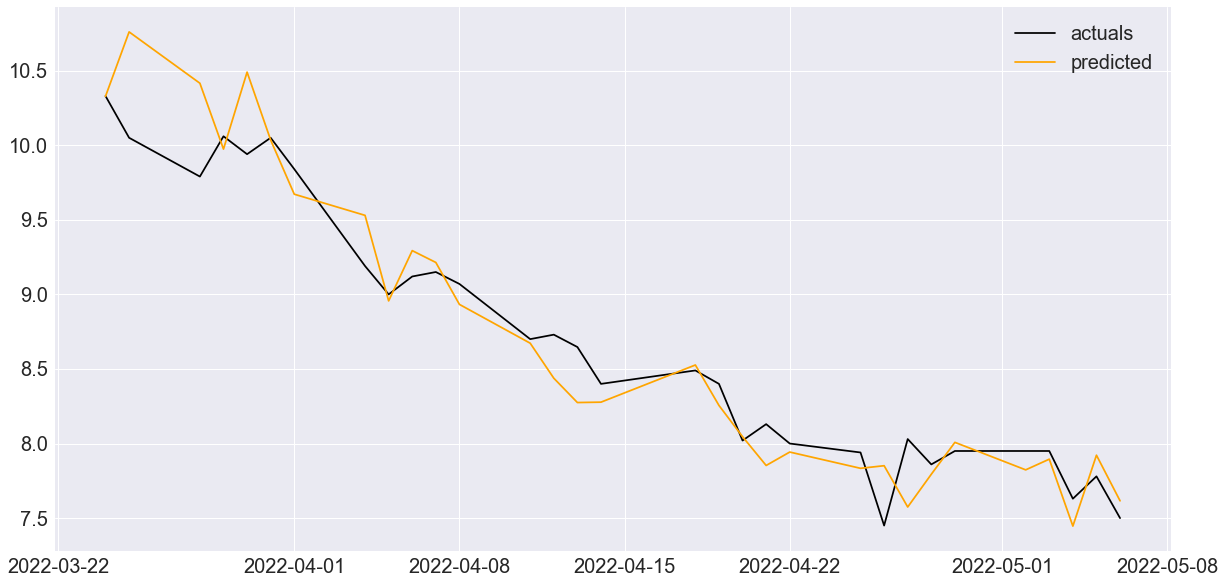

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['vrnof_next_close'], color='black')
ax.plot(y_test1['vrnof_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## VRNOF, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_vrnof, df_etfs_dow, on='Date', how='left')
df2

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   
...                ...         ...        ...          ...           ...   
2022-05-03    7.860000    8.160000   7.800000     7.950000        382800   
2022-05-04    8.040000    8.040000   7.630000     7.950000        496100   
2022-05-05    8.030000    8.030000   7.320000     7.630000       1401900   
2022-05-06    7.594000    7.880000   7.120000     7.780000       1411200   
2022-05-09    7.450000    7.900000   7.350000     7.500000        532100   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18               NaN         25.350000         NaN            NaN   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   
...                      ...               ...         ...            ...   
2022-05-03             7.950          7.950000    0.000000       0.000000   
2022-05-04             7.950          7.630000    0.000000       0.000000   
2022-05-05             7.950          7.780000   -0.320000      -0.040252   
2022-05-06             7.630          7.500000    0.150000       0.019659   
2022-05-09             7.780               NaN   -0.280000      -0.035990   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                   NaN                  NaN                    NaN   
2021-02-19                   NaN                  NaN                    NaN   
2021-02-22                   NaN                  NaN                    NaN   
2021-02-23                   NaN                  NaN                    NaN   
2021-02-24               24.2806                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-03                7.8480                0.002                  7.973   
2022-05-04                7.9480                0.100                  7.928   
2022-05-05                7.8680               -0.080                  7.889   
2022-05-06                7.8520               -0.016                  7.854   
2022-05-09                7.7620               -0.090                  7.804   

            vrnof_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2021-02-18                   NaN  25.719999  26.100000  24.200001  24.200001   
2021-02-19                   NaN  24.620001  25.260000  24.318001  24.959999   
2021-02-22                   NaN  24.580000  24.860001  24.049999  24.049999   
2021-02-23                   NaN  23.020000  23.430000  21.610001  23.260000   
2021-02-24                   NaN  23.820000  24.327999  23.270000  24.280001   
...                          ...        ...        ...        ...        ...   
2022-05-03                -0.054   8.340000   8.470000   8.240000   8.320000   
2022-05-04                -0.045   8.340000   8.590000   8.100000   8.590000   
2022-05-05                -0.039   8.500000   8.508000   8.010000   8.050000   
2022-05-06                -0.035   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [71]:
df_isna2 = df2.isna()
df_isna2

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18       False       False      False        False         False   
2021-02-19       False       False      False        False         False   
2021-02-22       False       False      False        False         False   
2021-02-23       False       False      False        False         False   
2021-02-24       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-03       False       False      False        False         False   
2022-05-04       False       False      False        False         False   
2022-05-05       False       False      False        False         False   
2022-05-06       False       False      False        False         False   
2022-05-09       False       False      False        False         False   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18              True             False        True           True   
2021-02-19             False             False       False          False   
2021-02-22             False             False       False          False   
2021-02-23             False             False       False          False   
2021-02-24             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-03             False             False       False          False   
2022-05-04             False             False       False          False   
2022-05-05             False             False       False          False   
2022-05-06             False             False       False          False   
2022-05-09             False              True       False          False   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                  True                 True                   True   
2021-02-19                  True                 True                   True   
2021-02-22                  True                 True                   True   
2021-02-23                  True                 True                   True   
2021-02-24                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-03                 False                False                  False   
2022-05-04                 False                False                  False   
2022-05-05                 False                False                  False   
2022-05-06                 False                False                  False   
2022-05-09                 False                False                  False   

            vrnof_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2021-02-18                  True    False    False   False     False   
2021-02-19                  True    False    False   False     False   
2021-02-22                  True    False    False   False     False   
2021-02-23                  True    False    False   False     False   
2021-02-24                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-03                 False    False    False   False     False   
2022-05-04                 False    False    False   False     False   
2022-05-05                 False    False    False   False     False   
2022-05-06                 False    False    False   False     False   
2022-05-09                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18             0.000         25.350000    0.000000       0.000000   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                0.0000                  0.0                    0.0   
2021-02-19                0.0000                  0.0                    0.0   
2021-02-22                0.0000                  0.0                    0.0   
2021-02-23                0.0000                  0.0                    0.0   
2021-02-24               24.2806                  0.0                    0.0   

            vrnof_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2021-02-18                   0.0  25.719999  26.100000  24.200001  24.200001   
2021-02-19                   0.0  24.620001  25.260000  24.318001  24.959999   
2021-02-22                   0.0  24.580000  24.860001  24.049999  24.049999   
2021-02-23                   0.0  23.020000  23.430000  21.610001  23.260000   
2021-02-24                   0.0  23.820000  24.327999  23.270000  24.280001   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2021-02-18    2585600      25.500000      24.959999 -1.299999   -0.050980   
2021-02-19    2299700      24.200001      24.049999  0.759998    0.031405   
2021-02-22    2447800      24.959999      23.260000 -0.910000   -0.036458   
2021-02-23    3856500      24.049999      24.280001 -0.789999   -0.032848   
2021-02-24    2125100      23.260000      22.850000  1.020001    0.043852   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-02-18          25.238001            -1.802              26.067   
2021-02-19          25.222000            -0.016              26.210   
2021-02-22          25.124000            -0.098              26.279   
2021-02-23          24.394000            -0.730              26.057   
2021-02-24          24.150000            -0.244              25.595   

            mj_10day_avg_diff  msos_Open  msos_High   msos_Low  msos_Close  \
Date                                                                         
2021-02-18              0.090  51.509998  51.520000  49.570000   49.759998   
2021-02-19              0.143  50.430000  52.209999  50.250000   51.939999   
2021-02-22              0.069  51.660000  51.773998  50.570000   51.000000   
2021-02-23             -0.222  49.700001  50.674999  46.279999   50.619999   
2021-02-24             -0.462  50.680000  51.080002  50.099998   50.470001   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-02-18    1010700.0        51.520000        51.939999  -1.760002   
2021-02-19     8

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

vrnof_Open  vrnof_High  vrnof_Low  vrnof_Close  vrnof_Volume  \
Date                                                                       
2021-02-18   25.219999   26.000000  23.728001    23.993000          7300   
2021-02-19   24.341000   28.000000  23.988001    25.350000        140000   
2021-02-22   24.542999   28.000000  23.790001    24.437000        278200   
2021-02-23   23.990000   24.400000  22.684000    23.993000        171900   
2021-02-24   24.000000   24.200001  22.990999    23.629999        180000   
...                ...         ...        ...          ...           ...   
2022-05-03    7.860000    8.160000   7.800000     7.950000        382800   
2022-05-04    8.040000    8.040000   7.630000     7.950000        496100   
2022-05-05    8.030000    8.030000   7.320000     7.630000       1401900   
2022-05-06    7.594000    7.880000   7.120000     7.780000       1411200   
2022-05-09    7.450000    7.900000   7.350000     7.500000        532100   

            vrnof_prev_close  vrnof_next_close  vrnof_diff  vrnof_%change  \
Date                                                                        
2021-02-18             0.000         25.350000    0.000000       0.000000   
2021-02-19            23.993         24.437000    1.357000       0.056558   
2021-02-22            25.350         23.993000   -0.913000      -0.036016   
2021-02-23            24.437         23.629999   -0.444000      -0.018169   
2021-02-24            23.993         22.929001   -0.363001      -0.015129   
...                      ...               ...         ...            ...   
2022-05-03             7.950          7.950000    0.000000       0.000000   
2022-05-04             7.950          7.630000    0.000000       0.000000   
2022-05-05             7.950          7.780000   -0.320000      -0.040252   
2022-05-06             7.630          7.500000    0.150000       0.019659   
2022-05-09             7.780          0.000000   -0.280000      -0.035990   

            vrnof_5day_avg_close  vrnof_5day_avg_diff  vrnof_10day_avg_close  \
Date                                                                           
2021-02-18                0.0000                0.000                  0.000   
2021-02-19                0.0000                0.000                  0.000   
2021-02-22                0.0000                0.000                  0.000   
2021-02-23                0.0000                0.000                  0.000   
2021-02-24               24.2806                0.000                  0.000   
...                          ...                  ...                    ...   
2022-05-03                7.8480                0.002                  7.973   
2022-05-04                7.9480                0.100                  7.928   
2022-05-05                7.8680               -0.080                  7.889   
2022-05-06                7.8520               -0.016                  7.854   
2022-05-09                7.7620               -0.090                  7.804   

            vrnof_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2021-02-18                 0.000  25.719999  26.100000  24.200001  24.200001   
2021-02-19                 0.000  24.620001  25.260000  24.318001  24.959999   
2021-02-22                 0.000  24.580000  24.860001  24.049999  24.049999   
2021-02-23                 0.000  23.020000  23.430000  21.610001  23.260000   
2021-02-24                 0.000  23.820000  24.327999  23.270000  24.280001   
...                          ...        ...        ...        ...        ...   
2022-05-03                -0.054   8.340000   8.470000   8.240000   8.320000   
2022-05-04                -0.045   8.340000   8.590000   8.100000   8.590000   
2022-05-05                -0.039   8.500000   8.508000   8.010000   8.050000   
2022-05-06                -0.035   8.010000   8.050000   7.750000   7.900000   
2022-05-09          

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'vrnof_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2021-02-18      2   18  2021        1   25.219999   26.000000  23.728001   
2021-02-19      2   19  2021        1   24.341000   28.000000  23.988001   
2021-02-22      2   22  2021        1   24.542999   28.000000  23.790001   
2021-02-23      2   23  2021        1   23.990000   24.400000  22.684000   
2021-02-24      2   24  2021        1   24.000000   24.200001  22.990999   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-03      5    3  2022        2    7.860000    8.160000   7.800000   
2022-05-04      5    4  2022        2    8.040000    8.040000   7.630000   
2022-05-05      5    5  2022        2    8.030000    8.030000   7.320000   
2022-05-06      5    6  2022        2    7.594000    7.880000   7.120000   
2022-05-09      5    9  2022        2    7.450000    7.900000   7.350000   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_next_close  \
Date                                                                        
2021-02-18    23.993000          7300             0.000         25.350000   
2021-02-19    25.350000        140000            23.993         24.437000   
2021-02-22    24.437000        278200            25.350         23.993000   
2021-02-23    23.993000        171900            24.437         23.629999   
2021-02-24    23.629999        180000            23.993         22.929001   
...                 ...           ...               ...               ...   
2022-05-03     7.950000        382800             7.950          7.950000   
2022-05-04     7.950000        496100             7.950          7.630000   
2022-05-05     7.630000       1401900             7.950          7.780000   
2022-05-06     7.780000       1411200             7.630          7.500000   
2022-05-09     7.500000        532100             7.780          0.000000   

            vrnof_diff  vrnof_%change  vrnof_5day_avg_close  \
Date                                                          
2021-02-18    0.000000       0.000000                0.0000   
2021-02-19    1.357000       0.056558                0.0000   
2021-02-22   -0.913000      -0.036016                0.0000   
2021-02-23   -0.444000      -0.018169                0.0000   
2021-02-24   -0.363001      -0.015129               24.2806   
...                ...            ...                   ...   
2022-05-03    0.000000       0.000000                7.8480   
2022-05-04    0.000000       0.000000                7.9480   
2022-05-05   -0.320000      -0.040252                7.8680   
2022-05-06    0.150000       0.019659                7.8520   
2022-05-09   -0.280000      -0.035990                7.7620   

            vrnof_5day_avg_diff  vrnof_10day_avg_close  vrnof_10day_avg_diff  \
Date                                                                           
2021-02-18                0.000                  0.000                 0.000   
2021-02-19                0.000                  0.000                 0.000   
2021-02-22                0.000                  0.000                 0.000   
2021-02-23                0.000                  0.000                 0.000   
2021-02-24                0.000                  0.000                 0.000   
...                         ...                    ...                   ...   
2022-05-03                0.002                  7.973                -0.054   
2022-05-04                0.100                  7.928                -0.045   
2022-05-05               -0.080                  7.889                -0.039   
2022-05-06               -0.016                  7.854                -0.035   
2022-05-09               -0.090                  7.804                -0.050   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2021-02-18  25.719999 

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

277

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

277
31


In [82]:
X_train2 = train2.drop('vrnof_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2021-02-18      2   18  2021        1   25.219999        26.0  23.728001   
2021-02-19      2   19  2021        1   24.341000        28.0  23.988001   
2021-02-22      2   22  2021        1   24.542999        28.0  23.790001   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_diff  \
Date                                                                  
2021-02-18       23.993          7300             0.000       0.000   
2021-02-19       25.350        140000            23.993       1.357   
2021-02-22       24.437        278200            25.350      -0.913   

            vrnof_%change  vrnof_5day_avg_close  vrnof_5day_avg_diff  \
Date                                                                   
2021-02-18       0.000000                   0.0                  0.0   
2021-02-19       0.056558                   0.0                  0.0   
2021-02-22      -0.036016                   0.0                  0.0   

            vrnof_10day_avg_close  vrnof_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2021-02-18                    0.0                   0.0  25.719999  26.100000   
2021-02-19                    0.0                   0.0  24.620001  25.260000   
2021-02-22                    0.0                   0.0  24.580000  24.860001   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2021-02-18  24.200001  24.200001    2585600      25.500000      24.959999   
2021-02-19  24.318001  24.959999    2299700      24.200001      24.049999   
2021-02-22  24.049999  24.049999    2447800      24.959999      23.260000   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2021-02-18 -1.299999   -0.050980          25.238001            -1.802   
2021-02-19  0.759998    0.031405          25.222000            -0.016   
2021-02-22 -0.910000   -0.036458          25.124000            -0.098   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2021-02-18              26.067              0.090  51.509998  51.520000   
2021-02-19              26.210              0.143  50.430000  52.209999   
2021-02-22              26.279              0.069  51.660000  51.773998   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2021-02-18     49.57   49.759998    1010700.0        51.520000   
2021-02-19     50.25   51.939999     834700.0        49.759998   
2021-02-22     50.57   51.000000     790300.0        51.939999   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2021-02-18        51.939999  -1.760002     -0.034162            51.484000   
2021-02-19        51.000000   2.180001      0.043810            51.575999   
2021-02-22        50.619999  -0.939999     -0.018098            51.431999   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2021-02-18              -1.058                51.506                0.260   
2021-02-19               0.092                51.800                0.294   
2021-02-22              -0.144                51.975                0.175   

            yolo_Open  yolo_High   yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                   
2021-02-18  27.900000  27.959999  26.549999   26.650000     581200.0   
2021-02-19  27.209999  27.690001  26.905001   27.690001     5

In [83]:
X_train2.shape

(277, 185)

In [84]:
y_train2 = train2['vrnof_next_close']
y_train2.head(3)

Date
2021-02-18    25.350
2021-02-19    24.437
2021-02-22    23.993
Name: vrnof_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2022-03-21    10.30
2022-03-22    10.28
2022-03-23    10.21
Name: vrnof_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('vrnof_next_close', axis=1)
y_test2 = test2['vrnof_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter  vrnof_Open  vrnof_High  vrnof_Low  \
Date                                                                       
2022-03-24      3   24  2022        1       10.55       10.64      10.16   
2022-03-25      3   25  2022        1       10.60       10.70      10.14   
2022-03-28      3   28  2022        1       10.25       10.45       9.56   

            vrnof_Close  vrnof_Volume  vrnof_prev_close  vrnof_diff  \
Date                                                                  
2022-03-24        10.21        471600             10.28       -0.07   
2022-03-25        10.33        439200             10.21        0.12   
2022-03-28        10.05        532500             10.33       -0.28   

            vrnof_%change  vrnof_5day_avg_close  vrnof_5day_avg_diff  \
Date                                                                   
2022-03-24      -0.006809                10.312                0.100   
2022-03-25       0.011753                10.294               -0.018   
2022-03-28      -0.027106                10.234               -0.060   

            vrnof_10day_avg_close  vrnof_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2022-03-24                 9.8488                0.0370     9.92    10.70   
2022-03-25                 9.9478                0.0990    11.35    11.45   
2022-03-28                10.0550                0.1072    10.93    11.00   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2022-03-24    9.66     10.56    4073100           9.79          11.22   
2022-03-25   10.52     11.22    7266200          10.56          10.67   
2022-03-28   10.46     10.67    2765000          11.22          10.90   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2022-03-24     0.77    0.078652              9.904             0.220   
2022-03-25     0.66    0.062500             10.200             0.296   
2022-03-28    -0.55   -0.049020             10.428             0.228   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2022-03-24               9.394              0.154  20.290001  21.160000   
2022-03-25               9.647              0.253  21.000000  21.450001   
2022-03-28               9.863              0.216  20.670000  20.820000   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2022-03-24  19.950001   20.469999    3635000.0        20.290001   
2022-03-25  20.330000   20.790001    3746600.0        20.469999   
2022-03-28  19.615000   20.280001    1588100.0        20.790001   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2022-03-24        20.790001   0.179998      0.008871            20.550000   
2022-03-25        20.280001   0.320002      0.015633            20.568000   
2022-03-28        20.760000  -0.510000     -0.024531            20.506001   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2022-03-24               0.140                19.601                0.134   
2022-03-25               0.018                19.818                0.217   
2022-03-28              -0.062                20.067                0.249   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2022-03-24      10.50     10.941     10.32       10.85      79800.0   
2022-03-25      11.57     11.570     10.84       11.04     237800.0   
2022-03-28      11.04     11.040 

In [88]:
X_test2.shape

(31, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-04    7.63
2022-05-05    7.78
2022-05-06    7.50
Name: vrnof_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([10.22297191, 10.68196343, 10.19458365,  9.76680018, 10.50007454])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

0.3421300782160477


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

0.2637461911111699


In [94]:
hyper_table.append(dict(version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

In [95]:
y_train2 = pd.DataFrame(y_train2, columns=['vrnof_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['vrnof_next_close'])

In [96]:
y_test2['vrnof_pred_next_close'] = y_pred2

In [97]:
y_test2.tail()

vrnof_next_close  vrnof_pred_next_close
Date                                               
2022-05-02              7.95               7.959184
2022-05-03              7.95               8.065572
2022-05-04              7.63               8.275521
2022-05-05              7.78               8.230272
2022-05-06              7.50               8.376386

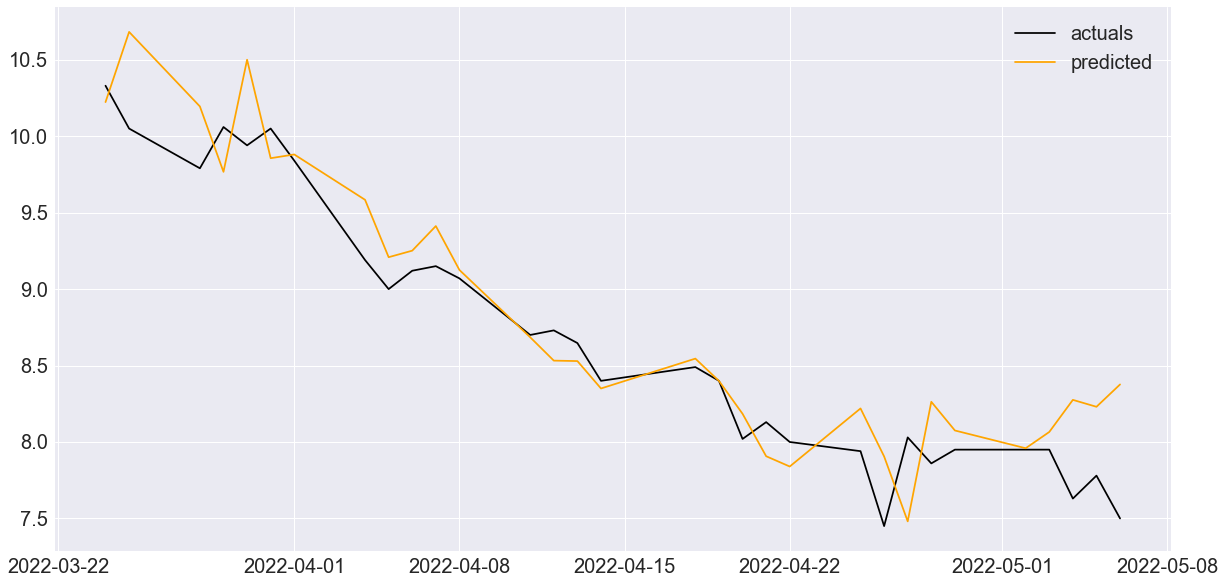

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['vrnof_next_close'], color='black')
ax.plot(y_test2['vrnof_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (VRNOF target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy()
df3

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-02-18      2   18  2021        1  40.049999  41.150002  36.490002   
2021-02-19      2   19  2021        1  37.090000  39.540001  36.810001   
2021-02-22      2   22  2021        1  38.380001  38.900002  36.900002   
2021-02-23      2   23  2021        1  34.773998  35.560001  31.450001   
2021-02-24      2   24  2021        1  35.520000  36.389999  34.619999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2021-02-18  36.650002     8193600       40.459999       38.630001 -3.809997   
2021-02-19  38.630001     5923600       36.650002       37.009998  1.979999   
2021-02-22  37.009998     4334400       38.630001       35.310001 -1.620003   
2021-02-23  35.310001     8329900       37.009998       35.599998 -1.699997   
2021-02-24  35.599998     4130300       35.310001       33.209999  0.289997   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2021-02-18    -0.094167           40.040001          -3.103999   
2021-02-19     0.054025           39.636001          -0.404000   
2021-02-22    -0.041936           38.976000          -0.660001   
2021-02-23    -0.045933           37.612000          -1.364000   
2021-02-24     0.008213           36.640000          -0.972000   
...                 ...                 ...                ...   
2022-05-03     0.001653            5.700000           0.152000   
2022-05-04     0.100660            5.988000           0.288000   
2022-05-05    -0.089955            6.112000           0.124000   
2022-05-06    -0.016474            6.164000           0.052000   
2022-05-09    -0.070352            6.064000          -0.100000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2021-02-18               43.240              -0.829       15.75   16.000000   
2021-02-19               42.689              -0.551       15.20   16.010000   
2021-02-22               42.097              -0.592       15.83   16.139999   
2021-02-23               41.241              -0.856       15.39   15.862000   
2021-02-24               39.892              -1.349       15.65   15.950000   
...                         ...                 ...         ...         ...   
2022-05-03                5.642               0.013        4.50    4.750000   
2022-05-04                5.736               0.094        4.22    4.414000   
2022-05-05                5.768               0.032        4.20    4.250000   
2022-05-06                5.808               0.040        3.92    4.340000   
2022-05-09                5.806              -0.002        4.30    4.300000   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

277

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

277
31


In [112]:
X_train3 = train3.drop('vrnof_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-02-18      2   18  2021        1  40.049999  41.150002  36.490002   
2021-02-19      2   19  2021        1  37.090000  39.540001  36.810001   
2021-02-22      2   22  2021        1  38.380001  38.900002  36.900002   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2021-02-18  36.650002     8193600       40.459999       38.630001 -3.809997   
2021-02-19  38.630001     5923600       36.650002       37.009998  1.979999   
2021-02-22  37.009998     4334400       38.630001       35.310001 -1.620003   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2021-02-18    -0.094167           40.040001          -3.103999   
2021-02-19     0.054025           39.636001          -0.404000   
2021-02-22    -0.041936           38.976000          -0.660001   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2021-02-18               43.240              -0.829       15.75   16.000000   
2021-02-19               42.689              -0.551       15.20   16.010000   
2021-02-22               42.097              -0.592       15.83   16.139999   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2021-02-18      15.05       15.145     1044700.0            15.714   
2021-02-19      15.18       15.861     1458600.0            15.145   
2021-02-22      15.50       15.650     1133700.0            15.861   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2021-02-18            15.861      -0.569      -0.036210               15.6838   
2021-02-19            15.650       0.716       0.047276               15.7376   
2021-02-22            15.660      -0.211      -0.013303               15.7130   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-02-18              -0.3510                15.6379                0.1295   
2021-02-19               0.0538                15.7490                0.1111   
2021-02-22              -0.0246                15.8570                0.1080   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-02-18     12.300      12.68    11.705       11.72    6125900.0   
2021-02-19     11.790      12.38    11.770       12.30    4608900.0   
2021-02-22     11.875      12.18    11.670       11.69    4551600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-02-18            12.48            12.30      -0.76     -0.060897   
2021-02-19            11.72            11.69       0.58      0.049488   
2021-02-22            12.30            11.13      -0.61     -0.049593   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-02-18               12.362              -0.766                12.797   
2021-02-19               12.392               0.030                12.808   
2021-02-22               12.276              -0.116                12.776   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-02-18               -0.053   17.000000   17.000000      16.01   
2021-02-19                0.011   16.35000

In [113]:
X_train3.shape

(277, 263)

In [114]:
y_train3 = train3['vrnof_next_close']
y_train3.head(3)

Date
2021-02-18    25.350
2021-02-19    24.437
2021-02-22    23.993
Name: vrnof_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2022-03-21    10.30
2022-03-22    10.28
2022-03-23    10.21
Name: vrnof_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('vrnof_next_close', axis=1)
y_test3 = test3['vrnof_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-03-24      3   24  2022        1      7.13      8.11    6.882       7.90   
2022-03-25      3   25  2022        1      8.55      8.79    7.765       8.69   
2022-03-28      3   28  2022        1      8.16      8.33    7.630       7.94   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-03-24    20149500            7.09            8.69      0.81     0.114245   
2022-03-25    38445700            7.90            7.94      0.79     0.100000   
2022-03-28    17777800            8.69            8.03     -0.75    -0.086306   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-03-24               7.268              0.226                6.714   
2022-03-25               7.582              0.314                6.975   
2022-03-28               7.766              0.184                7.199   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-03-24               0.150        6.59        6.59      5.690   
2022-03-25               0.261        6.01        6.43      5.942   
2022-03-28               0.224        6.00        6.14      5.849   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-03-24         5.82     1927600.0              6.04              6.02   
2022-03-25         6.02     1644000.0              5.82              5.95   
2022-03-28         5.95      706500.0              6.02              5.99   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-03-24       -0.22      -0.036424                6.2212   
2022-03-25        0.20       0.034364                6.1540   
2022-03-28       -0.07      -0.011628                6.0720   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-03-24              -0.0260                 5.9446                 0.017   
2022-03-25              -0.0672                 5.9926                 0.048   
2022-03-28              -0.0820                 6.0336                 0.041   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-03-24       3.69       4.08     3.570        3.99    7186500.0   
2022-03-25       4.17       4.29     3.820        4.25   12730000.0   
2022-03-28       4.00       4.10     3.831        3.95    4432100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-03-24             3.67             4.25       0.32      0.087193   
2022-03-25             3.99             3.95       0.26      0.065163   
2022-03-28             4.25             4.01      -0.30     -0.070588   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-03-24                3.708               0.102                 3.455   
2022-03-25                3.836               0.128                 3.571   
2022-03-28                3.910               0.074                 3.666   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-03-24                0.074       6.710        6.80      6.330   
2022-03-25                0.116       6.665        6.94      6

In [118]:
X_test3.shape

(31, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-04    7.63
2022-05-05    7.78
2022-05-06    7.50
Name: vrnof_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([11.09649248, 11.78461336, 11.16118644, 10.47140601, 10.56152221])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

0.6582164320368334


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

0.5093001330483303


In [124]:
hyper_table.append(dict(version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

In [125]:
y_train3 = pd.DataFrame(y_train3, columns=['vrnof_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['vrnof_next_close'])

In [126]:
y_test3['vrnof_pred_next_close'] = y_pred3

In [127]:
y_test3.tail()

vrnof_next_close  vrnof_pred_next_close
Date                                               
2022-05-02              7.95               7.467574
2022-05-03              7.95               7.614689
2022-05-04              7.63               7.527503
2022-05-05              7.78               7.649506
2022-05-06              7.50               5.919319

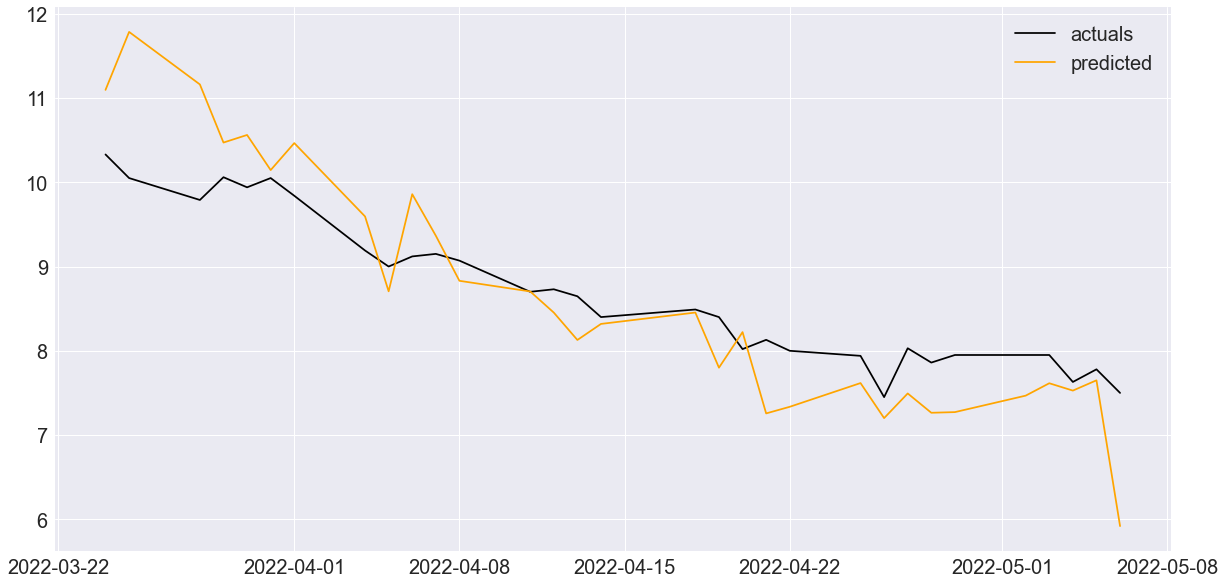

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['vrnof_next_close'], color='black')
ax.plot(y_test3['vrnof_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (VRNOF target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy()
df4

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-02-18      2   18  2021        1  40.049999  41.150002  36.490002   
2021-02-19      2   19  2021        1  37.090000  39.540001  36.810001   
2021-02-22      2   22  2021        1  38.380001  38.900002  36.900002   
2021-02-23      2   23  2021        1  34.773998  35.560001  31.450001   
2021-02-24      2   24  2021        1  35.520000  36.389999  34.619999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2021-02-18  36.650002     8193600       40.459999       38.630001 -3.809997   
2021-02-19  38.630001     5923600       36.650002       37.009998  1.979999   
2021-02-22  37.009998     4334400       38.630001       35.310001 -1.620003   
2021-02-23  35.310001     8329900       37.009998       35.599998 -1.699997   
2021-02-24  35.599998     4130300       35.310001       33.209999  0.289997   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2021-02-18    -0.094167           40.040001          -3.103999   
2021-02-19     0.054025           39.636001          -0.404000   
2021-02-22    -0.041936           38.976000          -0.660001   
2021-02-23    -0.045933           37.612000          -1.364000   
2021-02-24     0.008213           36.640000          -0.972000   
...                 ...                 ...                ...   
2022-05-03     0.001653            5.700000           0.152000   
2022-05-04     0.100660            5.988000           0.288000   
2022-05-05    -0.089955            6.112000           0.124000   
2022-05-06    -0.016474            6.164000           0.052000   
2022-05-09    -0.070352            6.064000          -0.100000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2021-02-18               43.240              -0.829       15.75   16.000000   
2021-02-19               42.689              -0.551       15.20   16.010000   
2021-02-22               42.097              -0.592       15.83   16.139999   
2021-02-23               41.241              -0.856       15.39   15.862000   
2021-02-24               39.892              -1.349       15.65   15.950000   
...                         ...                 ...         ...         ...   
2022-05-03                5.642               0.013        4.50    4.750000   
2022-05-04                5.736               0.094        4.22    4.414000   
2022-05-05                5.768               0.032        4.20    4.250000   
2022-05-06                5.808               0.040        3.92    4.340000   
2022-05-09                5.806              -0.002        4.30    4.300000   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

277

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

277
31


In [142]:
X_train4 = train4.drop('vrnof_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-02-18      2   18  2021        1  40.049999  41.150002  36.490002   
2021-02-19      2   19  2021        1  37.090000  39.540001  36.810001   
2021-02-22      2   22  2021        1  38.380001  38.900002  36.900002   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2021-02-18  36.650002     8193600       40.459999       38.630001 -3.809997   
2021-02-19  38.630001     5923600       36.650002       37.009998  1.979999   
2021-02-22  37.009998     4334400       38.630001       35.310001 -1.620003   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2021-02-18    -0.094167           40.040001          -3.103999   
2021-02-19     0.054025           39.636001          -0.404000   
2021-02-22    -0.041936           38.976000          -0.660001   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2021-02-18               43.240              -0.829       15.75   16.000000   
2021-02-19               42.689              -0.551       15.20   16.010000   
2021-02-22               42.097              -0.592       15.83   16.139999   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2021-02-18      15.05       15.145     1044700.0            15.714   
2021-02-19      15.18       15.861     1458600.0            15.145   
2021-02-22      15.50       15.650     1133700.0            15.861   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2021-02-18            15.861      -0.569      -0.036210               15.6838   
2021-02-19            15.650       0.716       0.047276               15.7376   
2021-02-22            15.660      -0.211      -0.013303               15.7130   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-02-18              -0.3510                15.6379                0.1295   
2021-02-19               0.0538                15.7490                0.1111   
2021-02-22              -0.0246                15.8570                0.1080   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-02-18     12.300      12.68    11.705       11.72    6125900.0   
2021-02-19     11.790      12.38    11.770       12.30    4608900.0   
2021-02-22     11.875      12.18    11.670       11.69    4551600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-02-18            12.48            12.30      -0.76     -0.060897   
2021-02-19            11.72            11.69       0.58      0.049488   
2021-02-22            12.30            11.13      -0.61     -0.049593   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-02-18               12.362              -0.766                12.797   
2021-02-19               12.392               0.030                12.808   
2021-02-22               12.276              -0.116                12.776   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-02-18               -0.053   17.000000   17.000000      16.01   
2021-02-19                0.011   16.35000

In [143]:
X_train4.shape

(277, 289)

In [144]:
y_train4 = train4['vrnof_next_close']
y_train4.head(3)

Date
2021-02-18    25.350
2021-02-19    24.437
2021-02-22    23.993
Name: vrnof_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2022-03-21    10.30
2022-03-22    10.28
2022-03-23    10.21
Name: vrnof_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('vrnof_next_close', axis=1)
y_test4 = test4['vrnof_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-03-24      3   24  2022        1      7.13      8.11    6.882       7.90   
2022-03-25      3   25  2022        1      8.55      8.79    7.765       8.69   
2022-03-28      3   28  2022        1      8.16      8.33    7.630       7.94   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-03-24    20149500            7.09            8.69      0.81     0.114245   
2022-03-25    38445700            7.90            7.94      0.79     0.100000   
2022-03-28    17777800            8.69            8.03     -0.75    -0.086306   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-03-24               7.268              0.226                6.714   
2022-03-25               7.582              0.314                6.975   
2022-03-28               7.766              0.184                7.199   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-03-24               0.150        6.59        6.59      5.690   
2022-03-25               0.261        6.01        6.43      5.942   
2022-03-28               0.224        6.00        6.14      5.849   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-03-24         5.82     1927600.0              6.04              6.02   
2022-03-25         6.02     1644000.0              5.82              5.95   
2022-03-28         5.95      706500.0              6.02              5.99   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-03-24       -0.22      -0.036424                6.2212   
2022-03-25        0.20       0.034364                6.1540   
2022-03-28       -0.07      -0.011628                6.0720   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-03-24              -0.0260                 5.9446                 0.017   
2022-03-25              -0.0672                 5.9926                 0.048   
2022-03-28              -0.0820                 6.0336                 0.041   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-03-24       3.69       4.08     3.570        3.99    7186500.0   
2022-03-25       4.17       4.29     3.820        4.25   12730000.0   
2022-03-28       4.00       4.10     3.831        3.95    4432100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-03-24             3.67             4.25       0.32      0.087193   
2022-03-25             3.99             3.95       0.26      0.065163   
2022-03-28             4.25             4.01      -0.30     -0.070588   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-03-24                3.708               0.102                 3.455   
2022-03-25                3.836               0.128                 3.571   
2022-03-28                3.910               0.074                 3.666   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-03-24                0.074       6.710        6.80      6.330   
2022-03-25                0.116       6.665        6.94      6

In [148]:
X_test4.shape

(31, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-04    7.63
2022-05-05    7.78
2022-05-06    7.50
Name: vrnof_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([10.86726759, 11.73348119, 11.05635756, 10.66044201, 10.95269367])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

0.6828482786483367


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

0.5111226030054415


In [154]:
hyper_table.append(dict(version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

In [155]:
y_train4 = pd.DataFrame(y_train4, columns=['vrnof_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['vrnof_next_close'])

In [156]:
y_test4['vrnof_pred_next_close'] = y_pred4

In [157]:
y_test4.tail()

vrnof_next_close  vrnof_pred_next_close
Date                                               
2022-05-02              7.95               7.644812
2022-05-03              7.95               7.848618
2022-05-04              7.63               7.847817
2022-05-05              7.78               7.643455
2022-05-06              7.50               5.985046

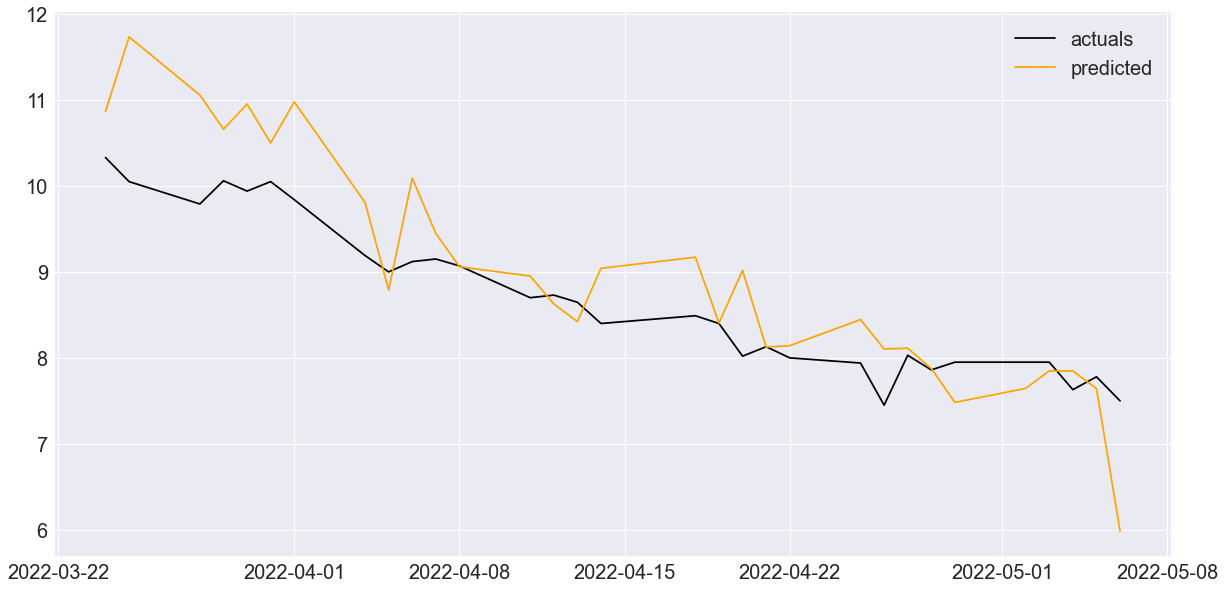

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['vrnof_next_close'], color='black')
ax.plot(y_test4['vrnof_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (VRNOF target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy()
df5

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-02-18      2   18  2021        1  40.049999  41.150002  36.490002   
2021-02-19      2   19  2021        1  37.090000  39.540001  36.810001   
2021-02-22      2   22  2021        1  38.380001  38.900002  36.900002   
2021-02-23      2   23  2021        1  34.773998  35.560001  31.450001   
2021-02-24      2   24  2021        1  35.520000  36.389999  34.619999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2021-02-18  36.650002     8193600       40.459999       38.630001 -3.809997   
2021-02-19  38.630001     5923600       36.650002       37.009998  1.979999   
2021-02-22  37.009998     4334400       38.630001       35.310001 -1.620003   
2021-02-23  35.310001     8329900       37.009998       35.599998 -1.699997   
2021-02-24  35.599998     4130300       35.310001       33.209999  0.289997   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2021-02-18    -0.094167           40.040001          -3.103999   
2021-02-19     0.054025           39.636001          -0.404000   
2021-02-22    -0.041936           38.976000          -0.660001   
2021-02-23    -0.045933           37.612000          -1.364000   
2021-02-24     0.008213           36.640000          -0.972000   
...                 ...                 ...                ...   
2022-05-03     0.001653            5.700000           0.152000   
2022-05-04     0.100660            5.988000           0.288000   
2022-05-05    -0.089955            6.112000           0.124000   
2022-05-06    -0.016474            6.164000           0.052000   
2022-05-09    -0.070352            6.064000          -0.100000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2021-02-18               43.240              -0.829       15.75   16.000000   
2021-02-19               42.689              -0.551       15.20   16.010000   
2021-02-22               42.097              -0.592       15.83   16.139999   
2021-02-23               41.241              -0.856       15.39   15.862000   
2021-02-24               39.892              -1.349       15.65   15.950000   
...                         ...                 ...         ...         ...   
2022-05-03                5.642               0.013        4.50    4.750000   
2022-05-04                5.736               0.094        4.22    4.414000   
2022-05-05                5.768               0.032        4.20    4.250000   
2022-05-06                5.808               0.040        3.92    4.340000   
2022-05-09                5.806              -0.002        4.30    4.300000   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

277

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

277
31


In [172]:
X_train5 = train5.drop('vrnof_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-02-18      2   18  2021        1  40.049999  41.150002  36.490002   
2021-02-19      2   19  2021        1  37.090000  39.540001  36.810001   
2021-02-22      2   22  2021        1  38.380001  38.900002  36.900002   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2021-02-18  36.650002     8193600       40.459999       38.630001 -3.809997   
2021-02-19  38.630001     5923600       36.650002       37.009998  1.979999   
2021-02-22  37.009998     4334400       38.630001       35.310001 -1.620003   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2021-02-18    -0.094167           40.040001          -3.103999   
2021-02-19     0.054025           39.636001          -0.404000   
2021-02-22    -0.041936           38.976000          -0.660001   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2021-02-18               43.240              -0.829       15.75   16.000000   
2021-02-19               42.689              -0.551       15.20   16.010000   
2021-02-22               42.097              -0.592       15.83   16.139999   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2021-02-18      15.05       15.145     1044700.0            15.714   
2021-02-19      15.18       15.861     1458600.0            15.145   
2021-02-22      15.50       15.650     1133700.0            15.861   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2021-02-18            15.861      -0.569      -0.036210               15.6838   
2021-02-19            15.650       0.716       0.047276               15.7376   
2021-02-22            15.660      -0.211      -0.013303               15.7130   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-02-18              -0.3510                15.6379                0.1295   
2021-02-19               0.0538                15.7490                0.1111   
2021-02-22              -0.0246                15.8570                0.1080   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-02-18     12.300      12.68    11.705       11.72    6125900.0   
2021-02-19     11.790      12.38    11.770       12.30    4608900.0   
2021-02-22     11.875      12.18    11.670       11.69    4551600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-02-18            12.48            12.30      -0.76     -0.060897   
2021-02-19            11.72            11.69       0.58      0.049488   
2021-02-22            12.30            11.13      -0.61     -0.049593   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-02-18               12.362              -0.766                12.797   
2021-02-19               12.392               0.030                12.808   
2021-02-22               12.276              -0.116                12.776   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-02-18               -0.053   17.000000   17.000000      16.01   
2021-02-19                0.011   16.35000

In [173]:
X_train5.shape

(277, 393)

In [174]:
y_train5 = train5['vrnof_next_close']
y_train5.head(3)

Date
2021-02-18    25.350
2021-02-19    24.437
2021-02-22    23.993
Name: vrnof_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2022-03-21    10.30
2022-03-22    10.28
2022-03-23    10.21
Name: vrnof_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('vrnof_next_close', axis=1)
y_test5 = test5['vrnof_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-03-24      3   24  2022        1      7.13      8.11    6.882       7.90   
2022-03-25      3   25  2022        1      8.55      8.79    7.765       8.69   
2022-03-28      3   28  2022        1      8.16      8.33    7.630       7.94   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-03-24    20149500            7.09            8.69      0.81     0.114245   
2022-03-25    38445700            7.90            7.94      0.79     0.100000   
2022-03-28    17777800            8.69            8.03     -0.75    -0.086306   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-03-24               7.268              0.226                6.714   
2022-03-25               7.582              0.314                6.975   
2022-03-28               7.766              0.184                7.199   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-03-24               0.150        6.59        6.59      5.690   
2022-03-25               0.261        6.01        6.43      5.942   
2022-03-28               0.224        6.00        6.14      5.849   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-03-24         5.82     1927600.0              6.04              6.02   
2022-03-25         6.02     1644000.0              5.82              5.95   
2022-03-28         5.95      706500.0              6.02              5.99   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-03-24       -0.22      -0.036424                6.2212   
2022-03-25        0.20       0.034364                6.1540   
2022-03-28       -0.07      -0.011628                6.0720   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-03-24              -0.0260                 5.9446                 0.017   
2022-03-25              -0.0672                 5.9926                 0.048   
2022-03-28              -0.0820                 6.0336                 0.041   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-03-24       3.69       4.08     3.570        3.99    7186500.0   
2022-03-25       4.17       4.29     3.820        4.25   12730000.0   
2022-03-28       4.00       4.10     3.831        3.95    4432100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-03-24             3.67             4.25       0.32      0.087193   
2022-03-25             3.99             3.95       0.26      0.065163   
2022-03-28             4.25             4.01      -0.30     -0.070588   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-03-24                3.708               0.102                 3.455   
2022-03-25                3.836               0.128                 3.571   
2022-03-28                3.910               0.074                 3.666   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-03-24                0.074       6.710        6.80      6.330   
2022-03-25                0.116       6.665        6.94      6

In [178]:
X_test5.shape

(31, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-04    7.63
2022-05-05    7.78
2022-05-06    7.50
Name: vrnof_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([10.074567  ,  9.82650172, 10.6386183 , 10.10077835, 10.42384578])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

0.6280647195991702


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

0.5228763867173147


In [184]:
hyper_table.append(dict(version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

In [185]:
y_train5 = pd.DataFrame(y_train5, columns=['vrnof_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['vrnof_next_close'])

In [186]:
y_test5['vrnof_pred_next_close'] = y_pred5

In [187]:
y_test5.tail()

vrnof_next_close  vrnof_pred_next_close
Date                                               
2022-05-02              7.95               7.654627
2022-05-03              7.95               6.862587
2022-05-04              7.63               7.233059
2022-05-05              7.78               7.899497
2022-05-06              7.50               7.309188

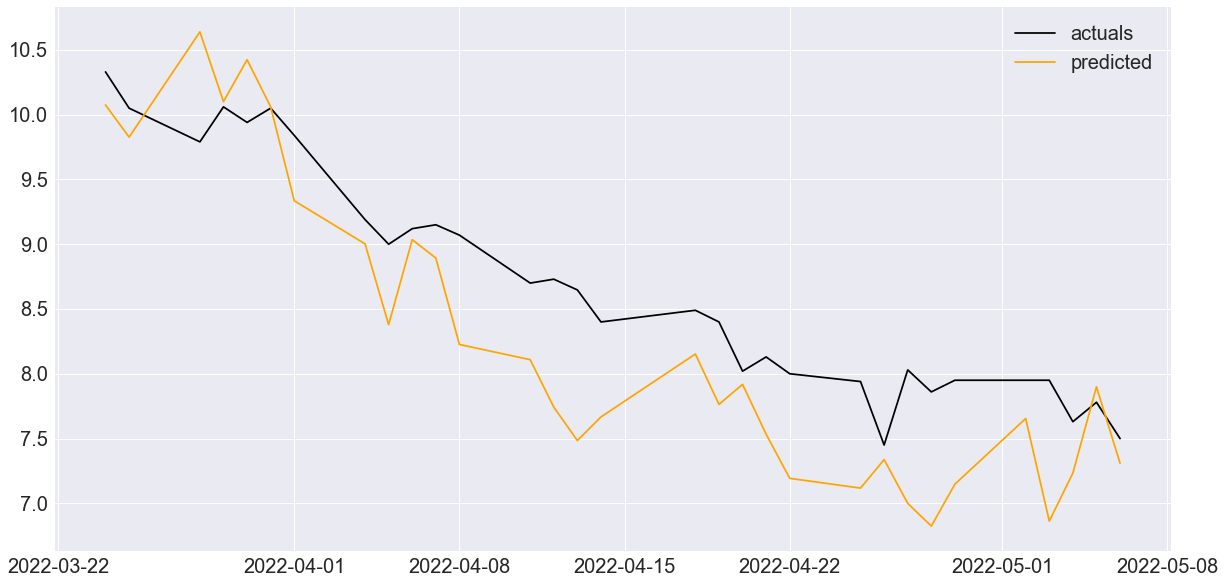

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['vrnof_next_close'], color='black')
ax.plot(y_test5['vrnof_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (VRNOF target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-03     False     False    False      False       False   
2022-05-04     False     False    False      False       False   
2022-05-05     False     False    False      False       False   
2022-05-06     False     False    False      False       False   
2022-05-09     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-03           False           False     False        False   
2022-05-04           False           False     False        False   
2022-05-05           False           False     False        False   
2022-05-06           False           False     False        False   
2022-05-09           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-03               False              False                False   
2022-05-04               False              False                False   
2022-05-05               False              False                False   
2022-05-06               False              False                False   
2022-05-09               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-03               False       False       False      False   
2022-05-04               False       False       False      False   
2022-05-05               False       False       False      False   
2022-05-06               False       False       False      False   
2022-05-09               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-03     6.000     6.270    5.945      6.060     5017600   
2022-05-04     6.050     6.710    5.850      6.670     7851100   
2022-05-05     6.470     6.590    6.010      6.070     5520300   
2022-05-06     6.010     6.140    5.758      5.970     3971100   
2022-05-09     5.720     5.875    5.550      5.550     4207600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-03           6.050           6.670     0.010     0.001653   
2022-05-04           6.060           6.070     0.610     0.100660   
2022-05-05           6.670           5.970    -0.600    -0.089955   
2022-05-06           6.070           5.550    -0.100    -0.016474   
2022-05-09           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07        0.000           0.0             0.000             0.000   
2014-04-08        0.000           0.0             0.000             0.000   
2014-04-09        0.000           0.0             0.000             0.000   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-03      5    3  2022        2     6.000     6.270    5.945      6.060   
2022-05-04      5    4  2022        2     6.050     6.710    5.850      6.670   
2022-05-05      5    5  2022        2     6.470     6.590    6.010      6.070   
2022-05-06      5    6  2022        2     6.010     6.140    5.758      5.970   
2022-05-09      5    9  2022        2     5.720     5.875    5.550      5.550   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-03     5017600           6.050           6.670     0.010     0.001653   
2022-05-04     7851100           6.060           6.070     0.610     0.100660   
2022-05-05     5520300           6.670           5.970    -0.600    -0.089955   
2022-05-06     3971100           6.070           5.550    -0.100    -0.016474   
2022-05-09     4207600           5.970           0.000    -0.420    -0.070352   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-03              5.7000              0.152                5.642   
2022-05-04              5.9880              0.288                5.736   
2022-05-05              6.1120              0.124                5.768   
2022-05-06              6.1640              0.052                5.808   
2022-05-09              6.0640             -0.100                5.806   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000        0.00       0.000       0.00   
2014-04-08               0.000        0.00       0.000       0.00   
2014-04-09               0.000        0.00       0.000       0.00   
2014-04-10               0.000        0.00       0.000       0.00   
2014-04-11               0.000        0.00       0.000       0.00   
...                        ...         ...         ...        ...   
2022-05-03               0.013        4.50       4.750       4.20   
2022-05-04               0.094        4.22       4.414       4.05   
2022-05-05               0.032        4.20       4.250       4.02   
2022-05-06               0.040        3.92       4.340       3.82   
2022-05-09              -0.002        4.30       4.300       3.98   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy()
df6

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-02-18      2   18  2021        1  40.049999  41.150002  36.490002   
2021-02-19      2   19  2021        1  37.090000  39.540001  36.810001   
2021-02-22      2   22  2021        1  38.380001  38.900002  36.900002   
2021-02-23      2   23  2021        1  34.773998  35.560001  31.450001   
2021-02-24      2   24  2021        1  35.520000  36.389999  34.619999   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-03      5    3  2022        2   6.000000   6.270000   5.945000   
2022-05-04      5    4  2022        2   6.050000   6.710000   5.850000   
2022-05-05      5    5  2022        2   6.470000   6.590000   6.010000   
2022-05-06      5    6  2022        2   6.010000   6.140000   5.758000   
2022-05-09      5    9  2022        2   5.720000   5.875000   5.550000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2021-02-18  36.650002     8193600       40.459999       38.630001 -3.809997   
2021-02-19  38.630001     5923600       36.650002       37.009998  1.979999   
2021-02-22  37.009998     4334400       38.630001       35.310001 -1.620003   
2021-02-23  35.310001     8329900       37.009998       35.599998 -1.699997   
2021-02-24  35.599998     4130300       35.310001       33.209999  0.289997   
...               ...         ...             ...             ...       ...   
2022-05-03   6.060000     5017600        6.050000        6.670000  0.010000   
2022-05-04   6.670000     7851100        6.060000        6.070000  0.610000   
2022-05-05   6.070000     5520300        6.670000        5.970000 -0.600000   
2022-05-06   5.970000     3971100        6.070000        5.550000 -0.100000   
2022-05-09   5.550000     4207600        5.970000        0.000000 -0.420000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2021-02-18    -0.094167           40.040001          -3.103999   
2021-02-19     0.054025           39.636001          -0.404000   
2021-02-22    -0.041936           38.976000          -0.660001   
2021-02-23    -0.045933           37.612000          -1.364000   
2021-02-24     0.008213           36.640000          -0.972000   
...                 ...                 ...                ...   
2022-05-03     0.001653            5.700000           0.152000   
2022-05-04     0.100660            5.988000           0.288000   
2022-05-05    -0.089955            6.112000           0.124000   
2022-05-06    -0.016474            6.164000           0.052000   
2022-05-09    -0.070352            6.064000          -0.100000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2021-02-18               43.240              -0.829       15.75   16.000000   
2021-02-19               42.689              -0.551       15.20   16.010000   
2021-02-22               42.097              -0.592       15.83   16.139999   
2021-02-23               41.241              -0.856       15.39   15.862000   
2021-02-24               39.892              -1.349       15.65   15.950000   
...                         ...                 ...         ...         ...   
2022-05-03                5.642               0.013        4.50    4.750000   
2022-05-04                5.736               0.094        4.22    4.414000   
2022-05-05                5.768               0.032        4.20    4.250000   
2022-05-06                5.808               0.040        3.92    4.340000   
2022-05-09                5.806              -0.002        4.30    4.300000   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

277

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

277
31


In [202]:
X_train6 = train6.drop('vrnof_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-02-18      2   18  2021        1  40.049999  41.150002  36.490002   
2021-02-19      2   19  2021        1  37.090000  39.540001  36.810001   
2021-02-22      2   22  2021        1  38.380001  38.900002  36.900002   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2021-02-18  36.650002     8193600       40.459999       38.630001 -3.809997   
2021-02-19  38.630001     5923600       36.650002       37.009998  1.979999   
2021-02-22  37.009998     4334400       38.630001       35.310001 -1.620003   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2021-02-18    -0.094167           40.040001          -3.103999   
2021-02-19     0.054025           39.636001          -0.404000   
2021-02-22    -0.041936           38.976000          -0.660001   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2021-02-18               43.240              -0.829       15.75   16.000000   
2021-02-19               42.689              -0.551       15.20   16.010000   
2021-02-22               42.097              -0.592       15.83   16.139999   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2021-02-18      15.05       15.145     1044700.0            15.714   
2021-02-19      15.18       15.861     1458600.0            15.145   
2021-02-22      15.50       15.650     1133700.0            15.861   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2021-02-18            15.861      -0.569      -0.036210               15.6838   
2021-02-19            15.650       0.716       0.047276               15.7376   
2021-02-22            15.660      -0.211      -0.013303               15.7130   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-02-18              -0.3510                15.6379                0.1295   
2021-02-19               0.0538                15.7490                0.1111   
2021-02-22              -0.0246                15.8570                0.1080   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-02-18     12.300      12.68    11.705       11.72    6125900.0   
2021-02-19     11.790      12.38    11.770       12.30    4608900.0   
2021-02-22     11.875      12.18    11.670       11.69    4551600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-02-18            12.48            12.30      -0.76     -0.060897   
2021-02-19            11.72            11.69       0.58      0.049488   
2021-02-22            12.30            11.13      -0.61     -0.049593   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-02-18               12.362              -0.766                12.797   
2021-02-19               12.392               0.030                12.808   
2021-02-22               12.276              -0.116                12.776   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-02-18               -0.053   17.000000   17.000000      16.01   
2021-02-19                0.011   16.35000

In [203]:
X_train6.shape

(277, 419)

In [204]:
y_train6 = train6['vrnof_next_close']
y_train6.head(3)

Date
2021-02-18    25.350
2021-02-19    24.437
2021-02-22    23.993
Name: vrnof_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2022-03-21    10.30
2022-03-22    10.28
2022-03-23    10.21
Name: vrnof_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('vrnof_next_close', axis=1)
y_test6 = test6['vrnof_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-03-24      3   24  2022        1      7.13      8.11    6.882       7.90   
2022-03-25      3   25  2022        1      8.55      8.79    7.765       8.69   
2022-03-28      3   28  2022        1      8.16      8.33    7.630       7.94   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-03-24    20149500            7.09            8.69      0.81     0.114245   
2022-03-25    38445700            7.90            7.94      0.79     0.100000   
2022-03-28    17777800            8.69            8.03     -0.75    -0.086306   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-03-24               7.268              0.226                6.714   
2022-03-25               7.582              0.314                6.975   
2022-03-28               7.766              0.184                7.199   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-03-24               0.150        6.59        6.59      5.690   
2022-03-25               0.261        6.01        6.43      5.942   
2022-03-28               0.224        6.00        6.14      5.849   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-03-24         5.82     1927600.0              6.04              6.02   
2022-03-25         6.02     1644000.0              5.82              5.95   
2022-03-28         5.95      706500.0              6.02              5.99   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-03-24       -0.22      -0.036424                6.2212   
2022-03-25        0.20       0.034364                6.1540   
2022-03-28       -0.07      -0.011628                6.0720   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-03-24              -0.0260                 5.9446                 0.017   
2022-03-25              -0.0672                 5.9926                 0.048   
2022-03-28              -0.0820                 6.0336                 0.041   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-03-24       3.69       4.08     3.570        3.99    7186500.0   
2022-03-25       4.17       4.29     3.820        4.25   12730000.0   
2022-03-28       4.00       4.10     3.831        3.95    4432100.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-03-24             3.67             4.25       0.32      0.087193   
2022-03-25             3.99             3.95       0.26      0.065163   
2022-03-28             4.25             4.01      -0.30     -0.070588   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-03-24                3.708               0.102                 3.455   
2022-03-25                3.836               0.128                 3.571   
2022-03-28                3.910               0.074                 3.666   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-03-24                0.074       6.710        6.80      6.330   
2022-03-25                0.116       6.665        6.94      6

In [208]:
X_test6.shape

(31, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-04    7.63
2022-05-05    7.78
2022-05-06    7.50
Name: vrnof_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([10.25140053, 10.20644653, 10.29851111,  9.62295647, 10.32415038])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

1.019691154470556


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

0.8219123179501734


In [214]:
hyper_table.append(dict(version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

In [215]:
y_train6 = pd.DataFrame(y_train6, columns=['vrnof_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['vrnof_next_close'])

In [216]:
y_test6['vrnof_pred_next_close'] = y_pred6

In [217]:
y_test6.tail()

vrnof_next_close  vrnof_pred_next_close
Date                                               
2022-05-02              7.95               6.014241
2022-05-03              7.95               5.731552
2022-05-04              7.63               6.489748
2022-05-05              7.78               7.354543
2022-05-06              7.50               6.863904

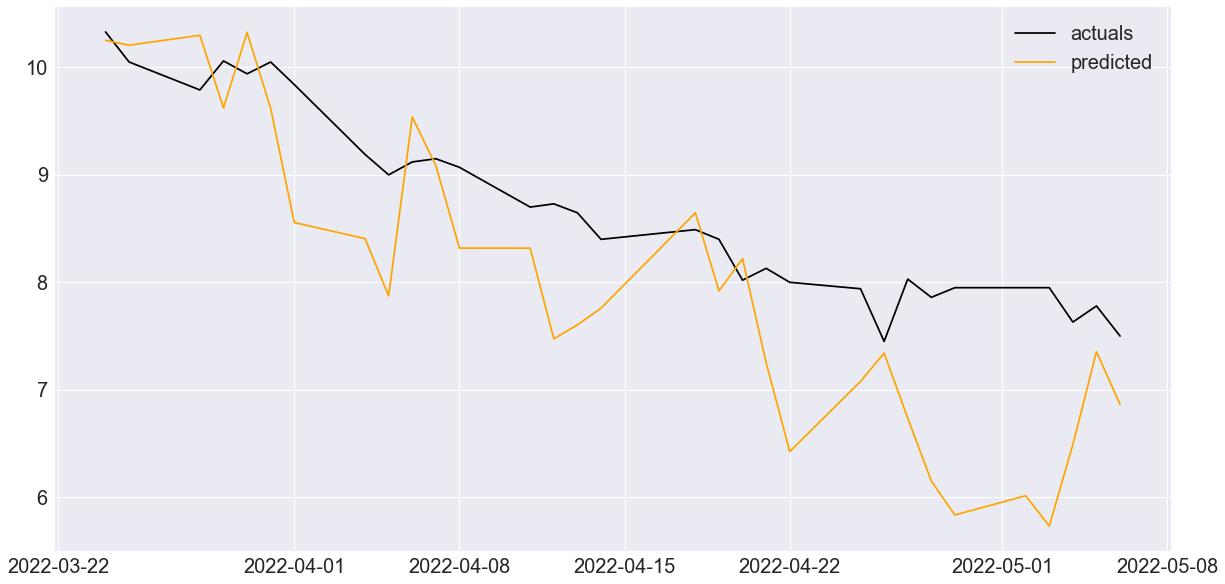

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['vrnof_next_close'], color='black')
ax.plot(y_test6['vrnof_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

version               model      rmse       mae  rows  train_rows  \
1        1+ETFs  LinearRegression()  0.267645  0.192896   308         277   
0         1+Dow  LinearRegression()  0.295808  0.230001   308         277   
2    1+ETFs+Dow  LinearRegression()  0.342130  0.263746   308         277   
5      All+ETFs  LinearRegression()  0.628065  0.522876   308         277   
3    All stocks  LinearRegression()  0.658216  0.509300   308         277   
4       All+Dow  LinearRegression()  0.682848  0.511123   308         277   
6  All+ETFs+Dow  LinearRegression()  1.019691  0.821912   308         277   

   test_rows  columns  
1         31      160  
0         31       56  
2         31      186  
5         31      394  
3         31      264  
4         31      290  
6         31      420

In [220]:
# hyper_table.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table.csv', index=False)